<a href="https://colab.research.google.com/github/YounseoKim62/python_for_DA/blob/main/2_store_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 내용

- pandas를 사용한 기본적인 EDA와 전처리
- pandas를 사용한 기초적 기술통계 활용
- seaborn을 사용한 데이터 시각화
- folium을 사용해 지도에 데이터 시각화

## 패키지 불러오기

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 한글폰트 설정

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install fonts-nanum* -qq

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)

plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

mpl.rcParams['axes.unicode_minus'] = False # 음수가 깨질때

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123598 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

## 데이터 로드

### 데이터 파일을 불러오고 확인

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/데이터 분석/공부/2. 상가(상권)정보로 기술통계 기초 익히기/상가업소정보_201912_01.csv',
                 sep = '|')
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(573680, 39)

In [4]:
# 모든 column이 표시되도록 max_columns의 수를 지정
pd.options.display.max_columns = 39

In [5]:
df.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
3  19912201       싱싱커피&토스트         NaN         Q       음식       Q07     패스트푸드   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드                  표준산업분류명  시도코드    시도명  \
0    Q09A01        호프/맥주   I56219                   기타 주점업    11  서울특별시   
1    Q12A01  커피전문점/카페/다방   I56220                 비알콜 음료점업    11  서울특별시   
2    Q09A01        호프/맥주   I56219                   기타 주점업    11  서울특별시   
3    Q07A10        토스트전문   I56192  피자, 햄버거, 샌드위치 및 유사 음식점업    26  부산광역시   
4    F09A02   사우나/증기탕/온천   S96121                      욕탕업    11  서울특별시   

   시군구코드 시군구명       행정동코드  행정동명       법정동코드 법정동명                 지번코드  대지구분코드  \
0  11680  강남구  1168060000  대치1동  1168010600  대치동  1168010600206040000       1   
1  11680  강남구  1168064000  역삼1동  1168010100  역삼동  1168010100206960042       1   
2  11545  금천구  1154563000  독산3동  1154510200  독산동  1154510200201620001       1   
3  26530  사상구  2653062000   괘법동  2653010400  괘법동  2653010400205780000       1   
4  11710  송파구  1171060000   석촌동  1171010500  석촌동  1171010500202560000       1   

  대지구분명  지번본번지  지번부번지                  지번주소         도로명코드               도로명  \
0    대지    604    NaN     서울특별시 강남구 대치동 604  116802000003   서울특별시 강남구 남부순환로   
1    대지    696   42.0  서울특별시 강남구 역삼동 696-42  116804166502  서울특별시 강남구 선릉로93길   
2    대지    162    1.0   서울특별시 금천구 독산동 162-1  115453117003     서울특별시 금천구 가산로   
3    대지    578    NaN     부산광역시 사상구 괘법동 578  265303139004     부산광역시 사상구 괘감로   
4    대지    256    NaN     서울특별시 송파구 석촌동 256  117103123001     서울특별시 송파구 가락로   

   건물본번지  건물부번지                     건물관리번호       건물명                 도로명주소  \
0   2933    NaN  1168010600106040000014378      대치상가  서울특별시 강남구 남부순환로 2933   
1      6    NaN  1168010100106960042022041       NaN    서울특별시 강남구 선릉로93길 6   
2     34    6.0  1154510200101620001017748       NaN    서울특별시 금천구 가산로 34-6   
3     37    NaN  2653010400105780000002037  산업용품유통상가      부산광역시 사상구 괘감로 37   
4     71    NaN  1171010500102560005010490       NaN      서울특별시 송파구 가락로 71   

    구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
0  135280   6280.0  NaN   1  NaN  127.061026  37.493922  
1  135080   6149.0  NaN   1  NaN  127.047883  37.505675  
2  153010   8545.0  NaN   1  NaN  126.899220  37.471711  
3  617726  46977.0  NaN   1   26  128.980455  35.159774  
4  138846   5690.0  NaN   1  NaN  127.104071  37.500249

In [6]:
df.tail()

상가업소번호       상호명  지점명 상권업종대분류코드  상권업종대분류명 상권업종중분류코드      상권업종중분류명  \
573675  16394290   비파티세리공덕  NaN         Q        음식       Q01            한식   
573676  16336474     앤탑PC방  NaN         N  관광/여가/오락       N01  PC/오락/당구/볼링등   
573677  16336218  오즈아레나PC방  NaN         N  관광/여가/오락       N01  PC/오락/당구/볼링등   
573678  16335152    파인트리네일  NaN         F     생활서비스       F01       이/미용/건강   
573679  16335150    마이리틀네일  NaN         F     생활서비스       F01       이/미용/건강   

       상권업종소분류코드   상권업종소분류명 표준산업분류코드      표준산업분류명  시도코드    시도명  시군구코드  시군구명  \
573675    Q01A01  한식/백반/한정식   I56111      한식 음식점업    11  서울특별시  11440   마포구   
573676    N01A01     인터넷PC방   R91222  컴퓨터 게임방 운영업    11  서울특별시  11200   성동구   
573677    N01A01     인터넷PC방   R91222  컴퓨터 게임방 운영업    11  서울특별시  11680   강남구   
573678    F01A02     발/네일케어   S96119        기타미용업    11  서울특별시  11560  영등포구   
573679    F01A02     발/네일케어   S96119        기타미용업    11  서울특별시  11320   도봉구   

             행정동코드    행정동명       법정동코드   법정동명                 지번코드  대지구분코드  \
573675  1144056500     공덕동  1144010200    공덕동  1144010200201050067       1   
573676  1120069000  성수2가3동  1120011500  성수동2가  1120011500202890015       1   
573677  1168052100    논현1동  1168010800    논현동  1168010800201650008       1   
573678  1156054000     여의동  1156011000   여의도동  1156011000200230000       1   
573679  1132051100     창1동  1132010700     창동  1132010700208120000       1   

       대지구분명  지번본번지  지번부번지                    지번주소         도로명코드  \
573675    대지    105   67.0    서울특별시 마포구 공덕동 105-67  114404139142   
573676    대지    289   15.0  서울특별시 성동구 성수동2가 289-15  112004109367   
573677    대지    165    8.0     서울특별시 강남구 논현동 165-8  116802102001   
573678    대지     23    NaN      서울특별시 영등포구 여의도동 23  115603118002   
573679    대지    812    NaN        서울특별시 도봉구 창동 812  113204127109   

                      도로명  건물본번지  건물부번지                     건물관리번호       건물명  \
573675  서울특별시 마포구 마포대로14길      4    NaN  1144010200101050067001710       NaN   
573676   서울특별시 성동구 성수일로8길     37    NaN  1120011500102890015004255  으뜸프린팅(주)   
573677     서울특별시 강남구 강남대로    492    NaN  1168010800101650008000001      한맥빌딩   
573678   서울특별시 영등포구 국제금융로     10    NaN  1156011000100230000000001  서울국제금융센터   
573679  서울특별시 도봉구 도봉로114길     22    8.0  1132010700108120000018489   현대타운아파트   

                         도로명주소   구우편번호   신우편번호  동정보  층정보  호정보          경도  \
573675     서울특별시 마포구 마포대로14길 4  121801  4211.0  NaN  NaN  NaN  126.955059   
573676     서울특별시 성동구 성수일로8길 37  133834  4794.0  NaN    2  NaN  127.054615   
573677      서울특별시 강남구 강남대로 492  135825  6119.0  NaN    2  NaN  127.024102   
573678     서울특별시 영등포구 국제금융로 10  150945  7326.0  NaN    1  NaN  126.924863   
573679  서울특별시 도봉구 도봉로114길 22-8  132691  1455.0  101  NaN  NaN  127.035145   

               위도  
573675  37.548618  
573676  37.545853  
573677  37.506202  
573678  37.525172  
573679  37.647099

In [7]:
# index 정보 보기
df.index

RangeIndex(start=0, stop=573680, step=1)

In [8]:
# columns가 무엇이 있는지 확인
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 요약

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 확인

In [10]:
n = df.isnull().sum()
n

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38],
 [Text(0, 0, '상가업소번호'),
  Text(1, 0, '상호명'),
  Text(2, 0, '지점명'),
  Text(3, 0, '상권업종대분류코드'),
  Text(4, 0, '상권업종대분류명'),
  Text(5, 0, '상권업종중분류코드'),
  Text(6, 0, '상권업종중분류명'),
  Text(7, 0, '상권업종소분류코드'),
  Text(8, 0, '상권업종소분류명'),
  Text(9, 0, '표준산업분류코드'),
  Text(10, 0, '표준산업분류명'),
  Text(11, 0, '시도코드'),
  Text(12, 0, '시도명'),
  Text(13, 0, '시군구코드'),
  Text(14, 0, '시군구명'),
  Text(15, 0, '행정동코드'),
  Text(16, 0, '행정동명'),
  Text(17, 0, '법정동코드'),
  Text(18, 0, '법정동명'),
  Text(19, 0, '지번코드'),
  Text(20, 0, '대지구분코드'),
  Text(21, 0, '대지구분명'),
  Text(22, 0, '지번본번지'),
  Text(23, 0, '지번부번지'),
  Text(24, 0, '지번주소'),
  Text(25, 0, '도로명코드'),
  Text(26, 0, '도로명'),
  Text(27, 0, '건물본번지'),
  Text(28, 0, '건물부번지'),
  Text(29, 0, '건물관리번호'),
  Text(30, 0, '건물명'),
  Text(31, 0, '도로명주소'),
  Te

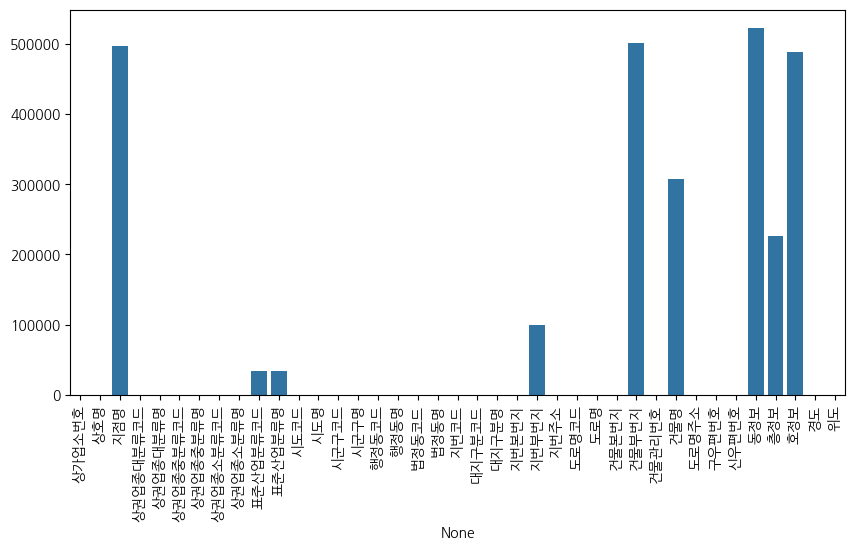

In [11]:
plt.figure(figsize = (10, 5))
sns.barplot(x = n.index, y = n.values)
plt.xticks(rotation = 90)

<Axes: ylabel='None'>

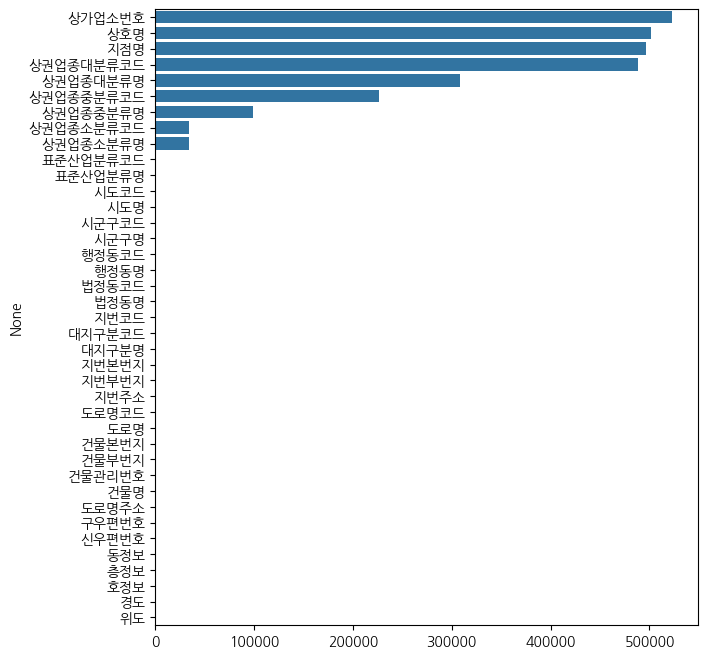

In [12]:
plt.figure(figsize = (7, 8))

# orient = 'h'를 사용하여 barplot를 가로로 표현
sns.barplot(x = n.sort_values(ascending=False).values,
            y = n.index,
            orient = 'h')

#### missingno 패키지를 사용하여 결측치 시각화

<Axes: >

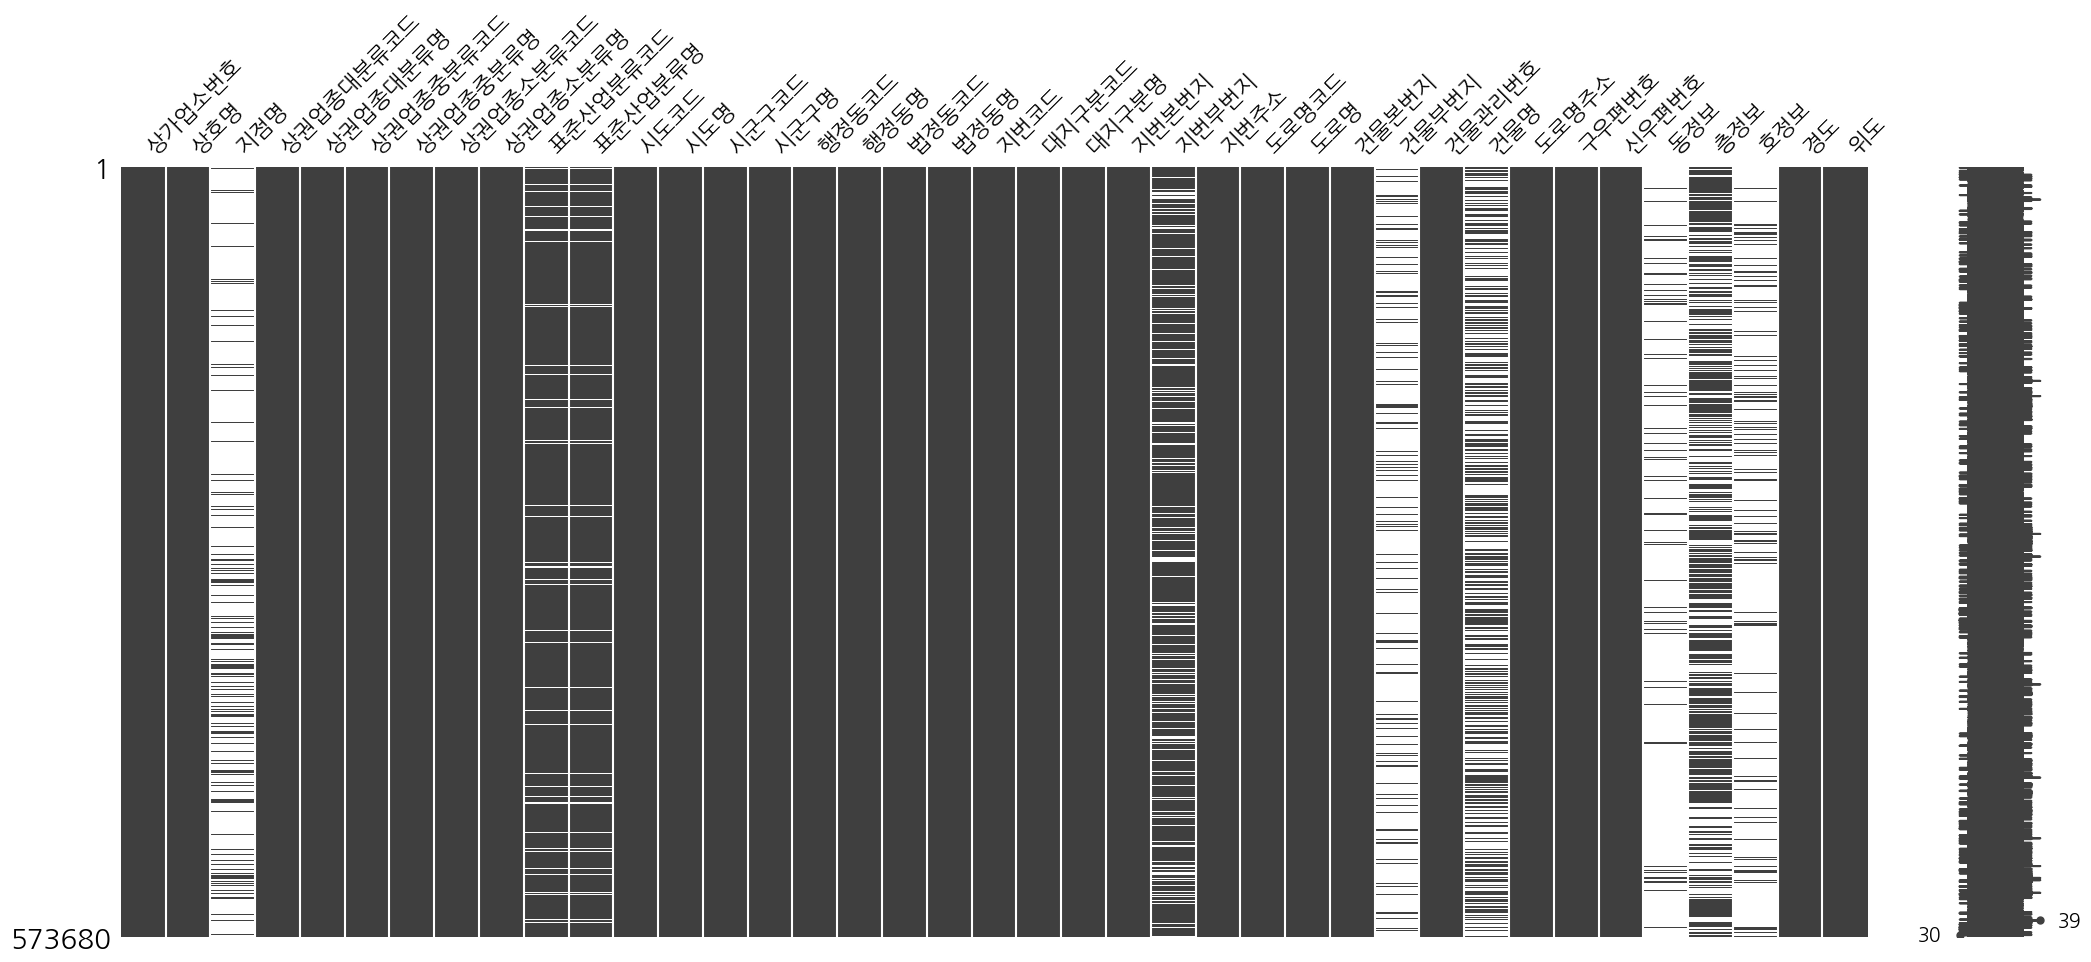

In [13]:
import missingno as msno

# matrix로 표현
msno.matrix(df)

<Axes: >

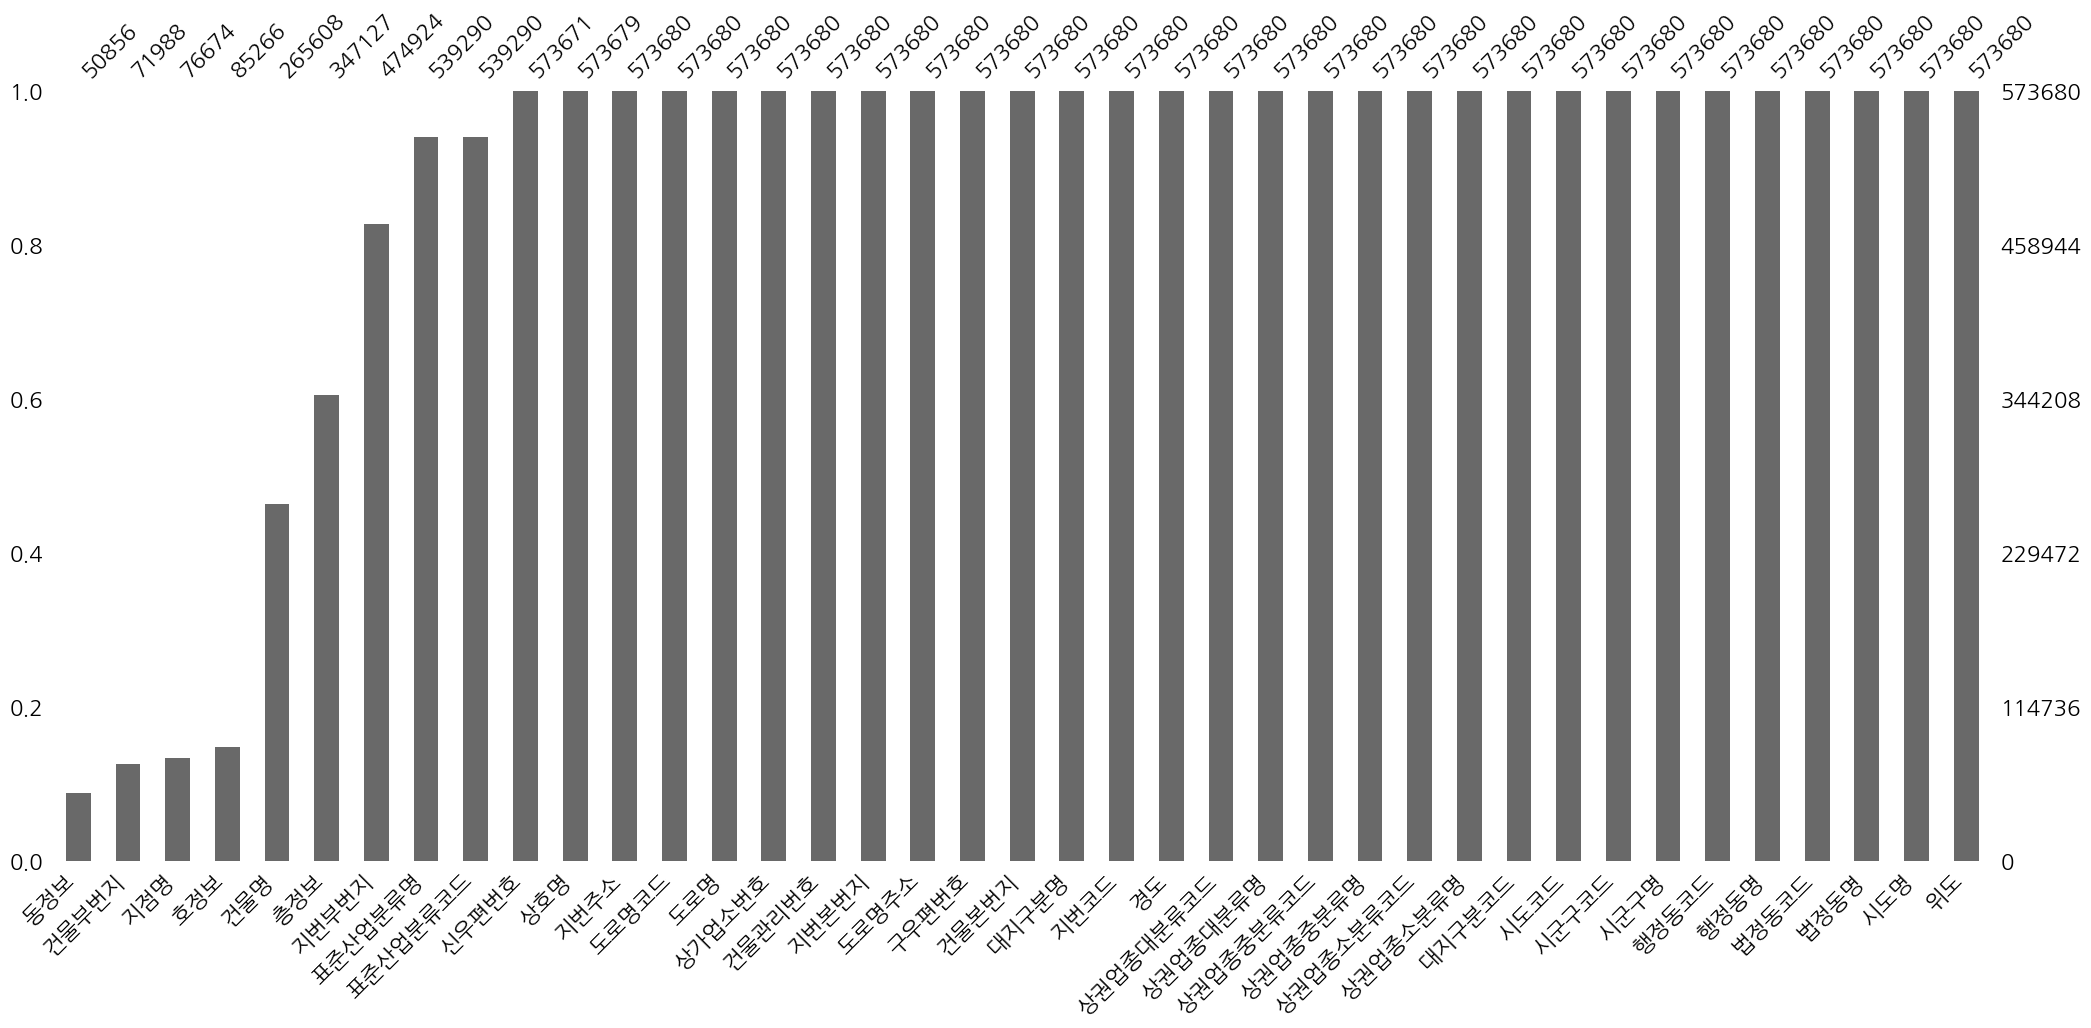

In [14]:
# bar graph로 표현
msno.bar(df, sort = 'ascending')

### 사용하지 않는 columns 제거

#### 결측치가 많은 columns 제거

In [15]:
# sort_values()를 사용해 결측치가 존재하는 9개의 변수를 가져와 not_use 변수에 담음

not_use = n.sort_values(ascending = False).index[:9]
not_use

Index(['동정보', '건물부번지', '지점명', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [16]:
# 결측치가 존재하는 9개의 columns를 제거 후 확인
print(df.shape)
df = df.drop(not_use, axis = 1)
print(df.shape)

(573680, 39)
(573680, 30)


#### eda에 사용되지 않는 columns 제거

In [17]:
# columns 이름을 전처리 하기위해 cols 변수에 담음
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [18]:
# '코드', '번호' 가 들어가는 columns을 cols_code 변수에 담음

# '코드|번호'의 '|'는 or
cols_code = cols[cols.str.contains('코드|번호')]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [19]:
# '코드', '번호' 가 들어가는 columns을 제거
print(df.shape)
df = df.drop(cols_code, axis = 1)
print(df.shape)

(573680, 30)
(573680, 16)


## 행, 열을 기준으로 값을 가져오기

### column 기준

In [ ]:
# 1개의 column을 pandas의 series 형태로 반환
df['상호명'].head()

0           와라와라호프
1    커피빈코리아선릉로93길점
2             프로포즈
3         싱싱커피&토스트
4         가락사우나내스낵
Name: 상호명, dtype: object

In [ ]:
# 2개의 column을 pandas의 dataframe 형태로 반환
df[['상호명', '도로명주소']].head()

상호명                 도로명주소
0         와라와라호프  서울특별시 강남구 남부순환로 2933
1  커피빈코리아선릉로93길점    서울특별시 강남구 선릉로93길 6
2           프로포즈    서울특별시 금천구 가산로 34-6
3       싱싱커피&토스트      부산광역시 사상구 괘감로 37
4       가락사우나내스낵      서울특별시 송파구 가락로 71

In [ ]:
# 1개의 column을 pandas의 dataframe 형태로 반환
df[['상호명']].head()

상호명
0         와라와라호프
1  커피빈코리아선릉로93길점
2           프로포즈
3       싱싱커피&토스트
4       가락사우나내스낵

### row 기준

In [ ]:
# 0번째 index row를 pandas의 series로 반환
df.loc[0]

상호명                       와라와라호프
상권업종대분류명                      음식
상권업종중분류명                    유흥주점
상권업종소분류명                   호프/맥주
시도명                        서울특별시
시군구명                         강남구
행정동명                        대치1동
법정동명                         대치동
대지구분명                         대지
지번본번지                        604
지번주소           서울특별시 강남구 대치동 604
도로명              서울특별시 강남구 남부순환로
건물본번지                       2933
도로명주소       서울특별시 강남구 남부순환로 2933
경도                    127.061026
위도                     37.493922
Name: 0, dtype: object

In [ ]:
# 0, 1, 2 번째 index row를 pandas의 dataframe으로 반환
df.loc[[0, 1, 2]]

상호명 상권업종대분류명 상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명 대지구분명  \
0         와라와라호프       음식     유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동    대지   
1  커피빈코리아선릉로93길점       음식   커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동    대지   
2           프로포즈       음식     유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동    대지   

   지번본번지                  지번주소               도로명  건물본번지                 도로명주소  \
0    604     서울특별시 강남구 대치동 604   서울특별시 강남구 남부순환로   2933  서울특별시 강남구 남부순환로 2933   
1    696  서울특별시 강남구 역삼동 696-42  서울특별시 강남구 선릉로93길      6    서울특별시 강남구 선릉로93길 6   
2    162   서울특별시 금천구 독산동 162-1     서울특별시 금천구 가산로     34    서울특별시 금천구 가산로 34-6   

           경도         위도  
0  127.061026  37.493922  
1  127.047883  37.505675  
2  126.899220  37.471711

In [ ]:
# 0번째 row의 '상호명'
df.loc[0, '상호명']

'와라와라호프'

In [ ]:
# 0, 1, 2번째 row의 '상호명'과 '도로명주소'
df.loc[[0, 1, 2], ['상호명', '도로명주소']]

상호명                 도로명주소
0         와라와라호프  서울특별시 강남구 남부순환로 2933
1  커피빈코리아선릉로93길점    서울특별시 강남구 선릉로93길 6
2           프로포즈    서울특별시 금천구 가산로 34-6

### iloc 로 슬라이싱을 통해 가져오기

In [ ]:
# 처음 5개의 row와 마지막 5개의 colum
df.iloc[:5, -5:]

도로명  건물본번지                 도로명주소          경도         위도
0   서울특별시 강남구 남부순환로   2933  서울특별시 강남구 남부순환로 2933  127.061026  37.493922
1  서울특별시 강남구 선릉로93길      6    서울특별시 강남구 선릉로93길 6  127.047883  37.505675
2     서울특별시 금천구 가산로     34    서울특별시 금천구 가산로 34-6  126.899220  37.471711
3     부산광역시 사상구 괘감로     37      부산광역시 사상구 괘감로 37  128.980455  35.159774
4     서울특별시 송파구 가락로     71      서울특별시 송파구 가락로 71  127.104071  37.500249

## 기술통계

### describe()

In [ ]:
df.describe()

지번본번지          건물본번지             경도             위도
count  573680.000000  573680.000000  573680.000000  573680.000000
mean      469.281810     153.912094     127.596287      36.854698
std       484.778049     276.980935       0.941262       1.081285
min         1.000000       0.000000     126.768169      35.006760
25%       109.000000      20.000000     126.968316      35.215422
50%       335.000000      50.000000     127.047672      37.511207
75%       678.000000     172.000000     128.986938      37.560362
max      9999.000000    3318.000000     129.292243      37.692398

In [ ]:
# 원하는 column만 지정해서 통계를 볼 수 있음
df[['위도', '경도']].describe()

위도             경도
count  573680.000000  573680.000000
mean       36.854698     127.596287
std         1.081285       0.941262
min        35.006760     126.768169
25%        35.215422     126.968316
50%        37.511207     127.047672
75%        37.560362     128.986938
max        37.692398     129.292243

In [ ]:
# inclue = 'object' 로 object 타입의 데이터를 요약
df.describe(include = 'object')

상호명 상권업종대분류명 상권업종중분류명   상권업종소분류명     시도명    시군구명    행정동명    법정동명  \
count   573679   573680   573680     573680  573680  573680  573680  573680   
unique  378758        9       94        709       2      39     629     648   
top      점프셈교실       음식       한식  한식/백반/한정식   서울특별시     강남구    역삼1동     역삼동   
freq      2297   185516    59725      38133  407376   47080   10400   12102   

         대지구분명                   지번주소             도로명                도로명주소  
count   573680                 573680          573680               573680  
unique       2                 190237           18001               190486  
top         대지  부산광역시 부산진구 부전동 503-15  서울특별시 서초구 신반포로  부산광역시 부산진구 가야대로 772  
freq    572913                   1058            3543                 1058

In [ ]:
# 1개의 object variable에 대한 요약
df['상권업종대분류명'].describe()

count     573680
unique         9
top           음식
freq      185516
Name: 상권업종대분류명, dtype: object

### 개별 기술통계 값 구하기

In [ ]:
# 결측치를 제외한 값의 개수를 계산
df['위도'].count()

573680

In [ ]:
# 평균
df['위도'].mean()

36.854697874220655

In [ ]:
# 최댓값
df['위도'].max()

37.6923983816612

In [ ]:
# 최솟값
df['위도'].min()

35.0067597383124

In [ ]:
# quantile
df['위도'].quantile(q = 0.25)

35.2154217343356

In [ ]:
# 중앙값
df['위도'].median()

37.5112070048312

In [ ]:
# variance
df['위도'].var()

1.1691762199812672

In [ ]:
# std
df['위도'].std()

1.0812845231396162

In [ ]:
# mode(): 가장 많이 나오는 값 (최빈값)
df['상권업종대분류명'].mode()

0    음식
Name: 상권업종대분류명, dtype: object

### numerical variable 시각화

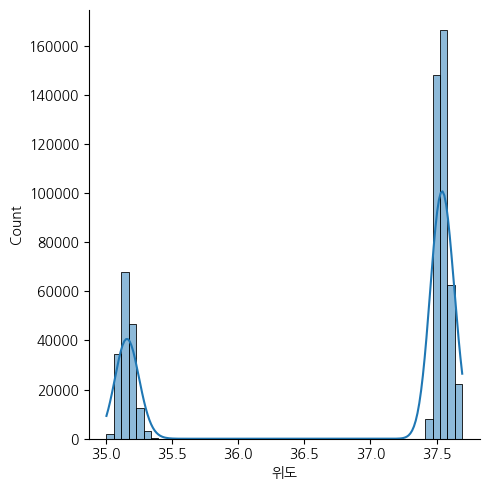

In [ ]:
# 위도의 displot
sns.displot(data = df, x = '위도', kde = True)

<Axes: xlabel='위도', ylabel='Density'>

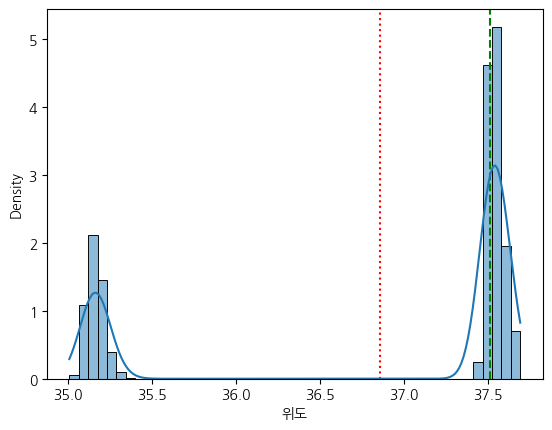

In [ ]:
# 위도의 평균, 중앙값을 displot 위에 표현
# color = 'r'과 linestyle = '--' or ':'를 사용해 선의 색과 모양을 선택
plt.axvline(x = df['위도'].mean(), color = 'r', linestyle = ':')
plt.axvline(x = df['위도'].median(), color = 'g', linestyle = '--')
sns.histplot(df['위도'], kde = True, stat = 'density')

### correlation (상관계수)

In [ ]:
# 각 변수의 correlation
corr = df.corr(numeric_only = True)
corr

지번본번지     건물본번지        경도        위도
지번본번지  1.000000  0.057987  0.182678 -0.196658
건물본번지  0.057987  1.000000  0.000255  0.004606
경도     0.182678  0.000255  1.000000 -0.994711
위도    -0.196658  0.004606 -0.994711  1.000000

<Axes: >

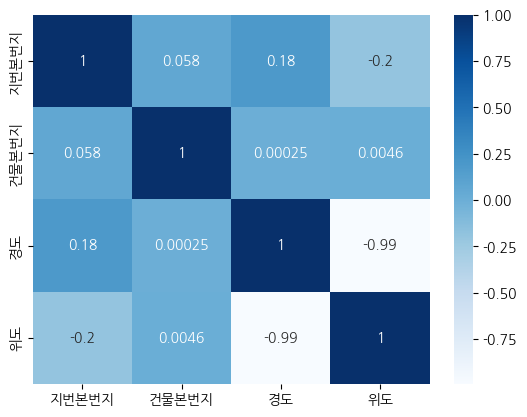

In [ ]:
# heatmap을 사용해 correlation 시각화
sns.heatmap(corr, annot = True, cmap = 'Blues')

### scatterplot

<Axes: xlabel='경도', ylabel='위도'>

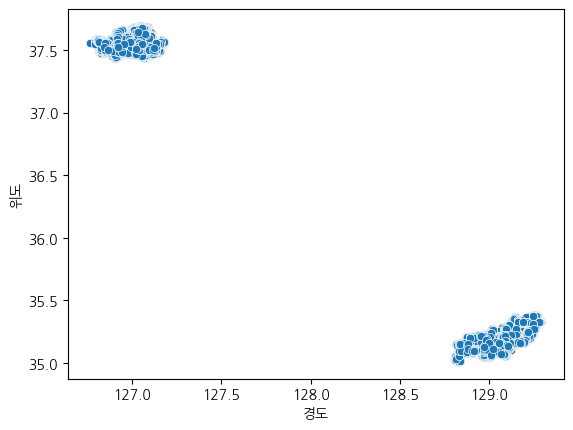

In [ ]:
# '경도'와 '위도'를 scatterplot으로 시각화
sns.scatterplot(data = df, x = '경도', y = '위도')

<Axes: xlabel='경도', ylabel='위도'>

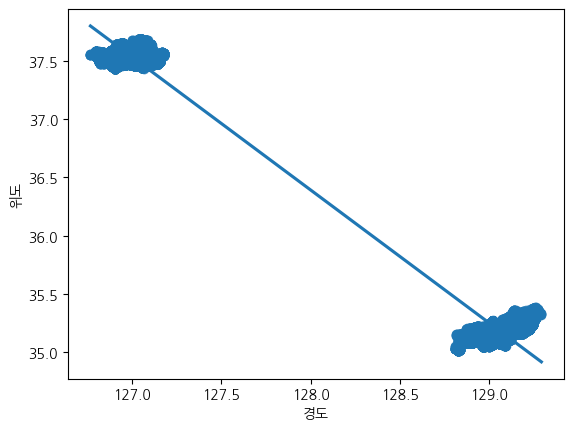

In [ ]:
# scatterplot에 regression line을 추가
sns.regplot(data = df, x = '경도', y = '위도')

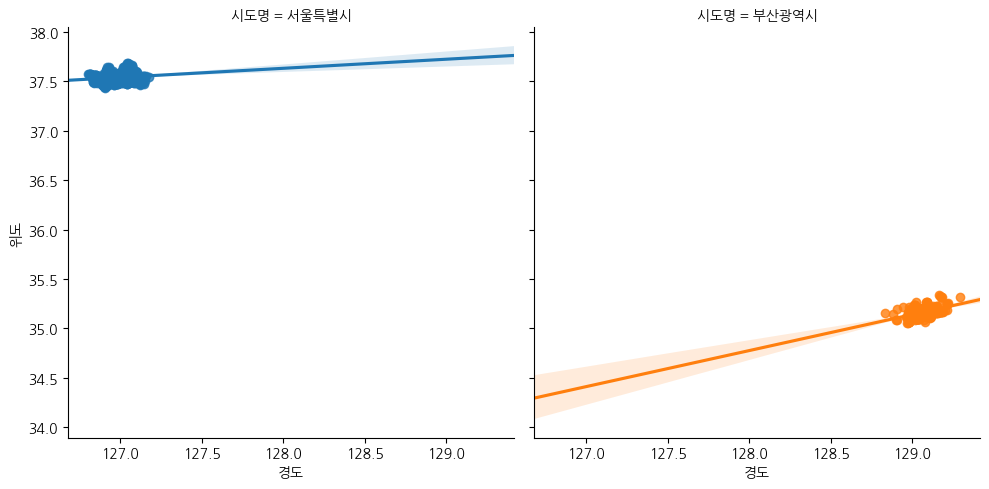

In [ ]:
sns.lmplot(data = df.sample(1000),
           x = '경도',
           y = '위도',
           col = '시도명',
           hue = '시도명',
           truncate = False,
           fit_reg = True)

## 인덱싱과 필터로 서브셋 만들기

### 강남구에 있는 음식점들만 보기

In [ ]:
# '상권업종대분류명'이 '음식'인 데이터만 가져오기
# 서브셋을 새로운 변수에 저장할 때 copy()를 사용하는 것을 권장
df_food = df[df['상권업종대분류명'] == '음식'].copy()
df_food.head()

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09     유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12   커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09     유흥주점   
3  19912201       싱싱커피&토스트         NaN         Q       음식       Q07    패스트푸드   
5  19983535            초밥왕         NaN         Q       음식       Q03   일식/수산물   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드                  표준산업분류명  시도코드    시도명  \
0    Q09A01        호프/맥주   I56219                   기타 주점업    11  서울특별시   
1    Q12A01  커피전문점/카페/다방   I56220                 비알콜 음료점업    11  서울특별시   
2    Q09A01        호프/맥주   I56219                   기타 주점업    11  서울특별시   
3    Q07A10        토스트전문   I56192  피자, 햄버거, 샌드위치 및 유사 음식점업    26  부산광역시   
5    Q03A03     음식점-초밥전문   I56113                  일식 음식점업    11  서울특별시   

   시군구코드 시군구명       행정동코드  행정동명       법정동코드 법정동명                 지번코드  대지구분코드  \
0  11680  강남구  1168060000  대치1동  1168010600  대치동  1168010600206040000       1   
1  11680  강남구  1168064000  역삼1동  1168010100  역삼동  1168010100206960042       1   
2  11545  금천구  1154563000  독산3동  1154510200  독산동  1154510200201620001       1   
3  26530  사상구  2653062000   괘법동  2653010400  괘법동  2653010400205780000       1   
5  11710  송파구  1171071000  잠실6동  1171010200  신천동  1171010200200070028       1   

  대지구분명  지번본번지  지번부번지                  지번주소         도로명코드               도로명  \
0    대지    604    NaN     서울특별시 강남구 대치동 604  116802000003   서울특별시 강남구 남부순환로   
1    대지    696   42.0  서울특별시 강남구 역삼동 696-42  116804166502  서울특별시 강남구 선릉로93길   
2    대지    162    1.0   서울특별시 금천구 독산동 162-1  115453117003     서울특별시 금천구 가산로   
3    대지    578    NaN     부산광역시 사상구 괘법동 578  265303139004     부산광역시 사상구 괘감로   
5    대지      7   28.0    서울특별시 송파구 신천동 7-28  117103123023    서울특별시 송파구 올림픽로   

   건물본번지  건물부번지                     건물관리번호       건물명                  도로명주소  \
0   2933    NaN  1168010600106040000014378      대치상가   서울특별시 강남구 남부순환로 2933   
1      6    NaN  1168010100106960042022041       NaN     서울특별시 강남구 선릉로93길 6   
2     34    6.0  1154510200101620001017748       NaN     서울특별시 금천구 가산로 34-6   
3     37    NaN  2653010400105780000002037  산업용품유통상가       부산광역시 사상구 괘감로 37   
5    293   19.0  1171010200100070028000237   현대타워아파트  서울특별시 송파구 올림픽로 293-19   

    구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
0  135280   6280.0  NaN   1  NaN  127.061026  37.493922  
1  135080   6149.0  NaN   1  NaN  127.047883  37.505675  
2  153010   8545.0  NaN   1  NaN  126.899220  37.471711  
3  617726  46977.0  NaN   1   26  128.980455  35.159774  
5  138735   5510.0  NaN   1  NaN  127.102490  37.515149

In [ ]:
# '시군구명'이 '강남구' 이고 '상권업종대분류명'이 '음식'인 서브셋을 생성한 후
# '상권업종중분류명' 별로 빈도수를 구함
df[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식')][
    '상권업종중분류명'].value_counts()

상권업종중분류명
한식         4371
커피점/카페     2790
유흥주점       1573
양식         1573
일식/수산물     1255
분식         1197
패스트푸드       786
제과제빵떡케익     650
닭/오리요리      539
중식          358
별식/퓨전요리     341
부페           63
기타음식업        47
음식배달서비스      11
Name: count, dtype: int64

In [ ]:
# loc을 사용하여
# '시군구명'이 '강남구' 이고 '상권업종대분류명'이 '음식'인 서브셋을 생성한 후
# '상권업종중분류명' 별로 빈도수를 구함

df.loc[(df['시군구명'] == '강남구') & (df['상권업종대분류명'] == '음식'),
       '상권업종중분류명'].value_counts()

상권업종중분류명
한식         4371
커피점/카페     2790
유흥주점       1573
양식         1573
일식/수산물     1255
분식         1197
패스트푸드       786
제과제빵떡케익     650
닭/오리요리      539
중식          358
별식/퓨전요리     341
부페           63
기타음식업        47
음식배달서비스      11
Name: count, dtype: int64

### 구별 음식점 업종 비교

In [ ]:
# 서울에 있는 음식점
df_seoul_food = df[(df['시도명'] == '서울특별시') &
                   (df['상권업종대분류명'] == '음식')].copy()
df_seoul_food.shape

(132889, 39)

In [ ]:
# '시군구명'과 '상권업종중분류명'으로 그룹화 하여 상점수를 확인
food_gu = df_seoul_food.pivot_table(index = ['시군구명', '상권업종중분류명'],
                                    values = '상호명',
                                    aggfunc = 'count')
food_gu.head()

상호명
시군구명 상권업종중분류명      
강남구  기타음식업       47
     닭/오리요리     539
     별식/퓨전요리    341
     부페          63
     분식        1197

In [ ]:
# reset_index()를 사용해 현재 index로 사용되는 column을 column으로 변환 후
# 숫자로 된 index를 생성
food = food_gu.reset_index()
food = food.rename(columns = {'상호명': '상호수'})
food.head()

시군구명 상권업종중분류명   상호수
0  강남구    기타음식업    47
1  강남구   닭/오리요리   539
2  강남구  별식/퓨전요리   341
3  강남구       부페    63
4  강남구       분식  1197

<Axes: xlabel='상권업종중분류명', ylabel='상호수'>

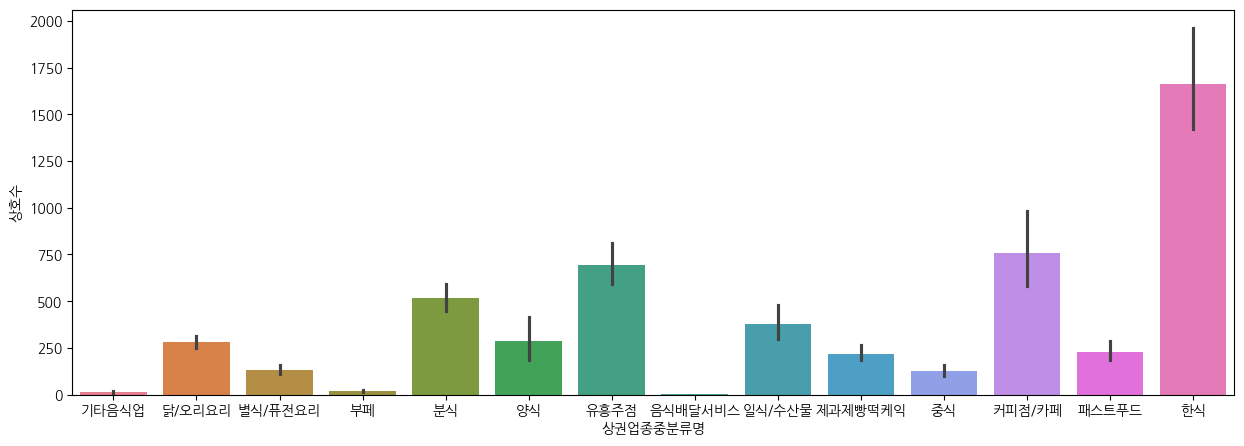

In [ ]:
# food를 barplot으로 시각화
plt.figure(figsize = (15, 5))
sns.barplot(data = food, x = '상권업종중분류명', y = '상호수', hue = '상권업종중분류명')

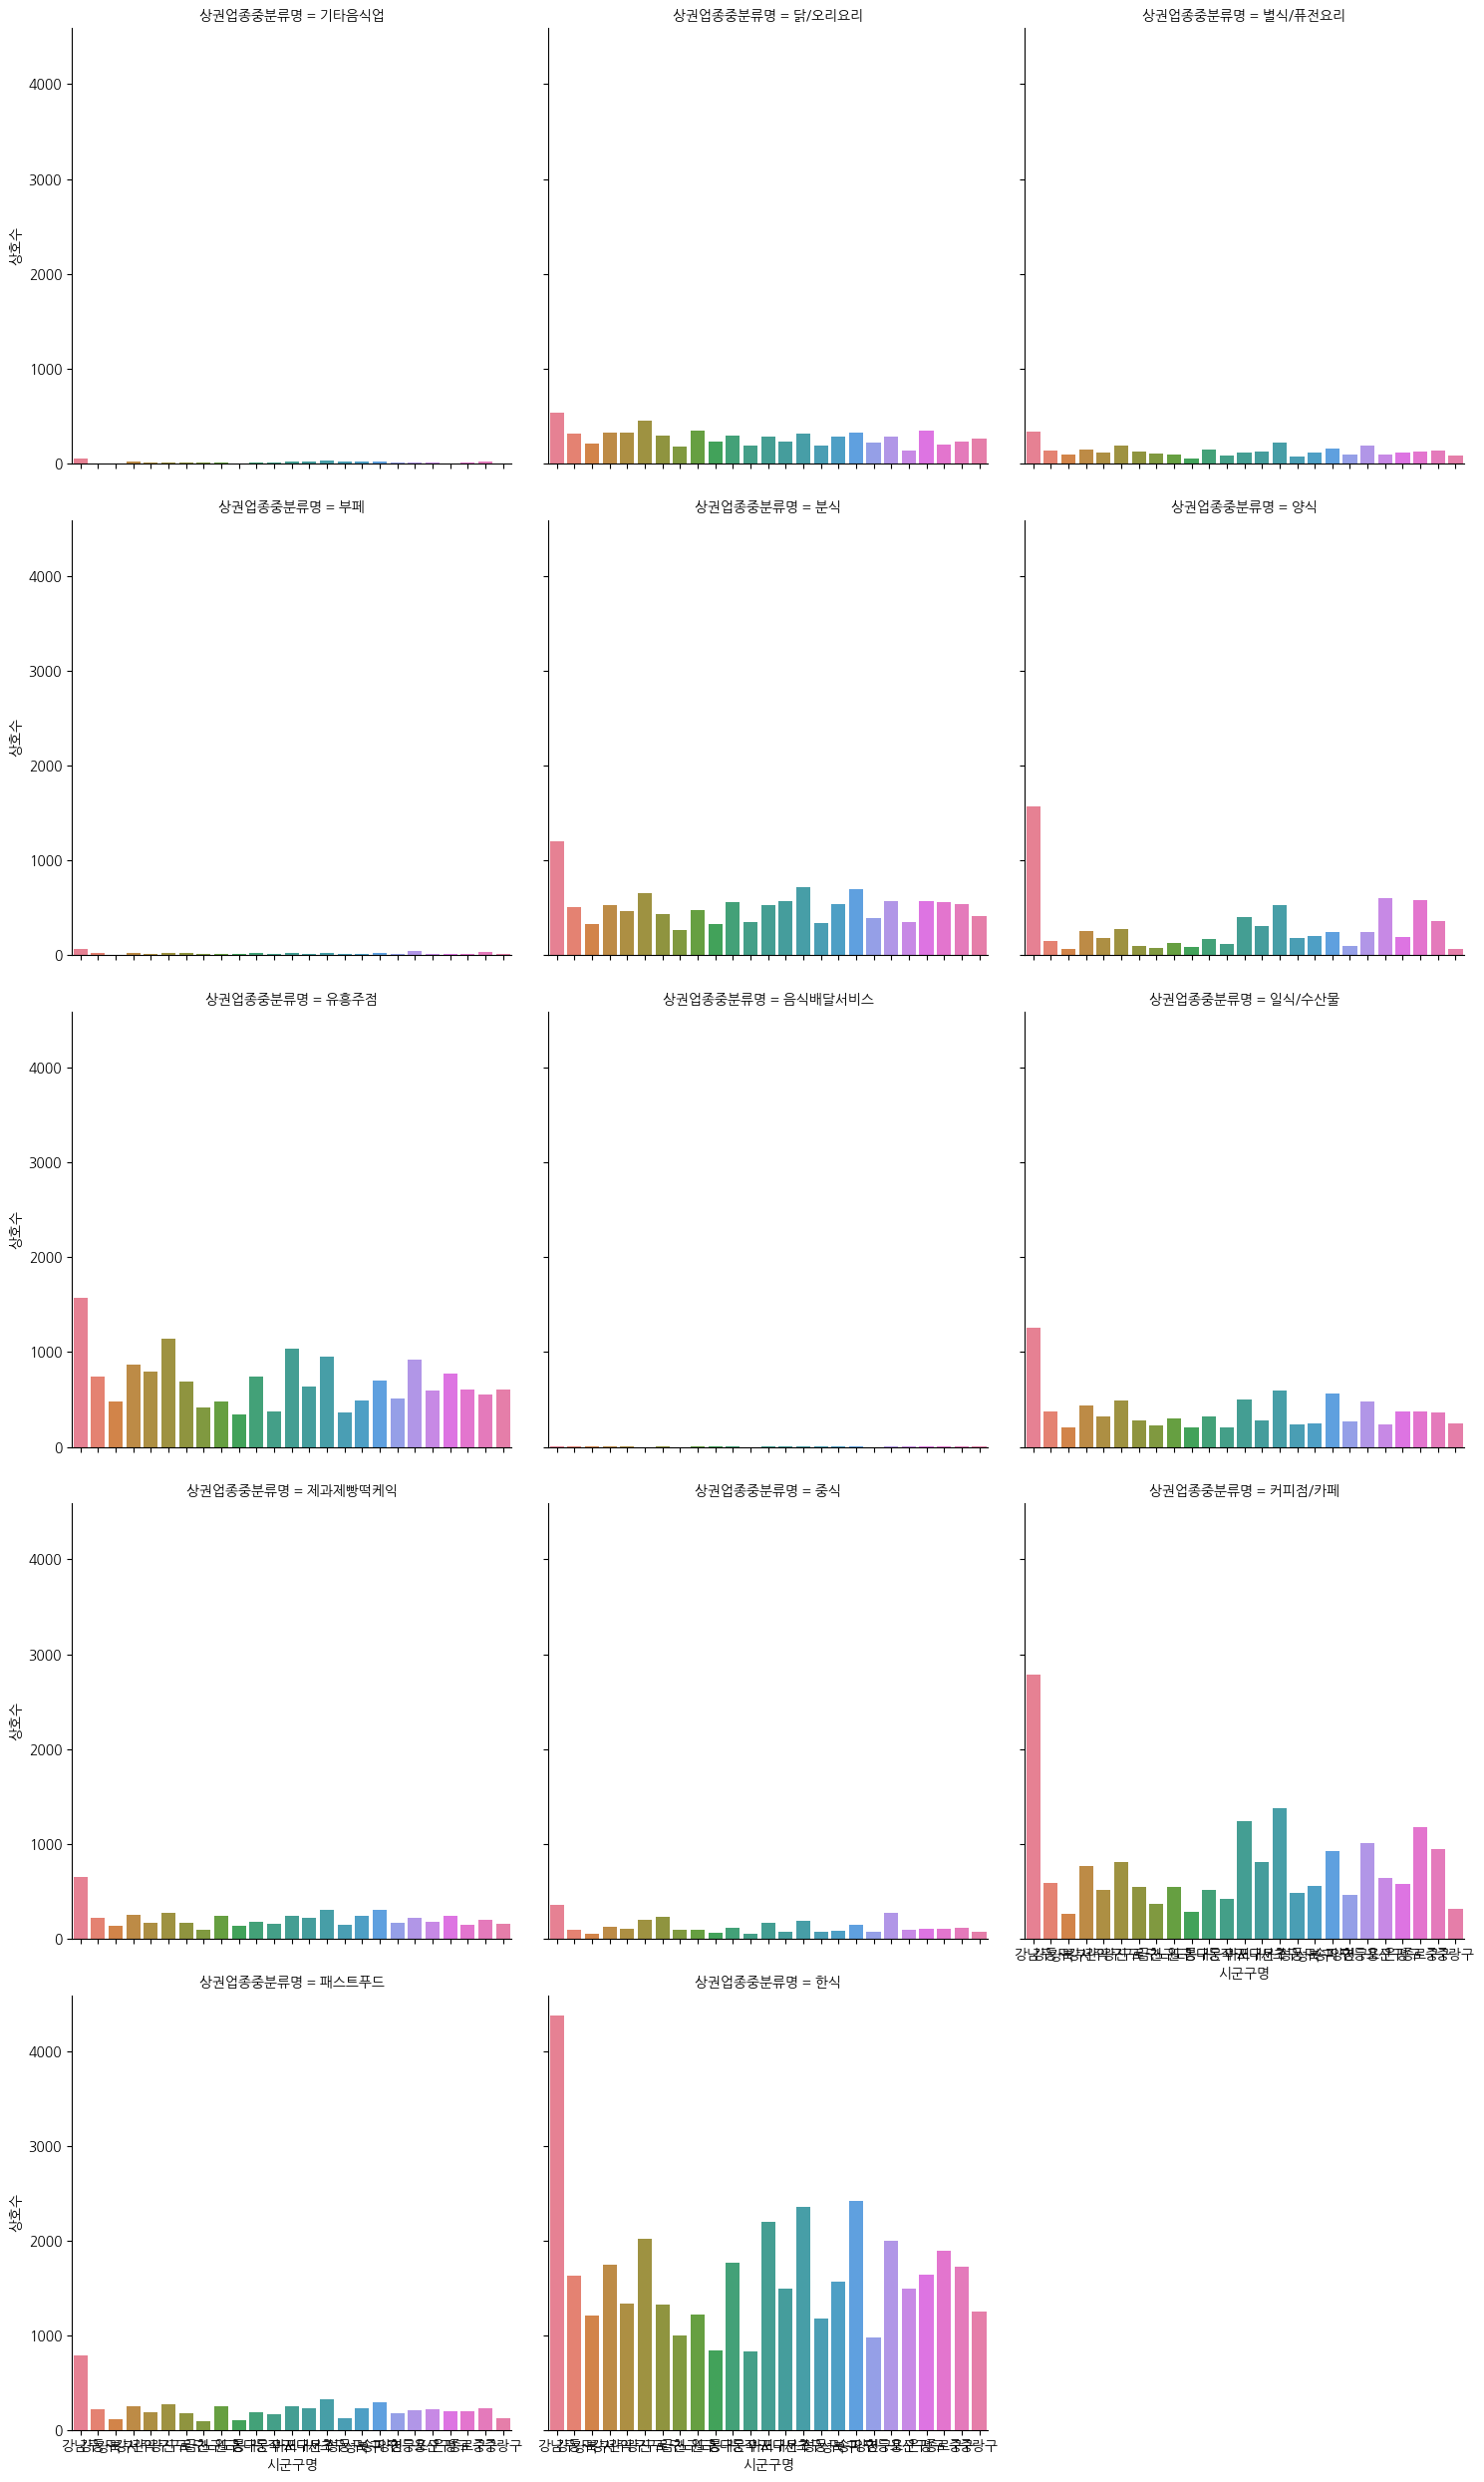

In [ ]:
# catplot으로 '상권업종중분류명'별로 시각화
sns.catplot(data = food,
            x = '시군구명',
            y = '상호수',
            kind = 'bar',
            col = '상권업종중분류명',
            col_wrap = 3,
            hue = '시군구명')

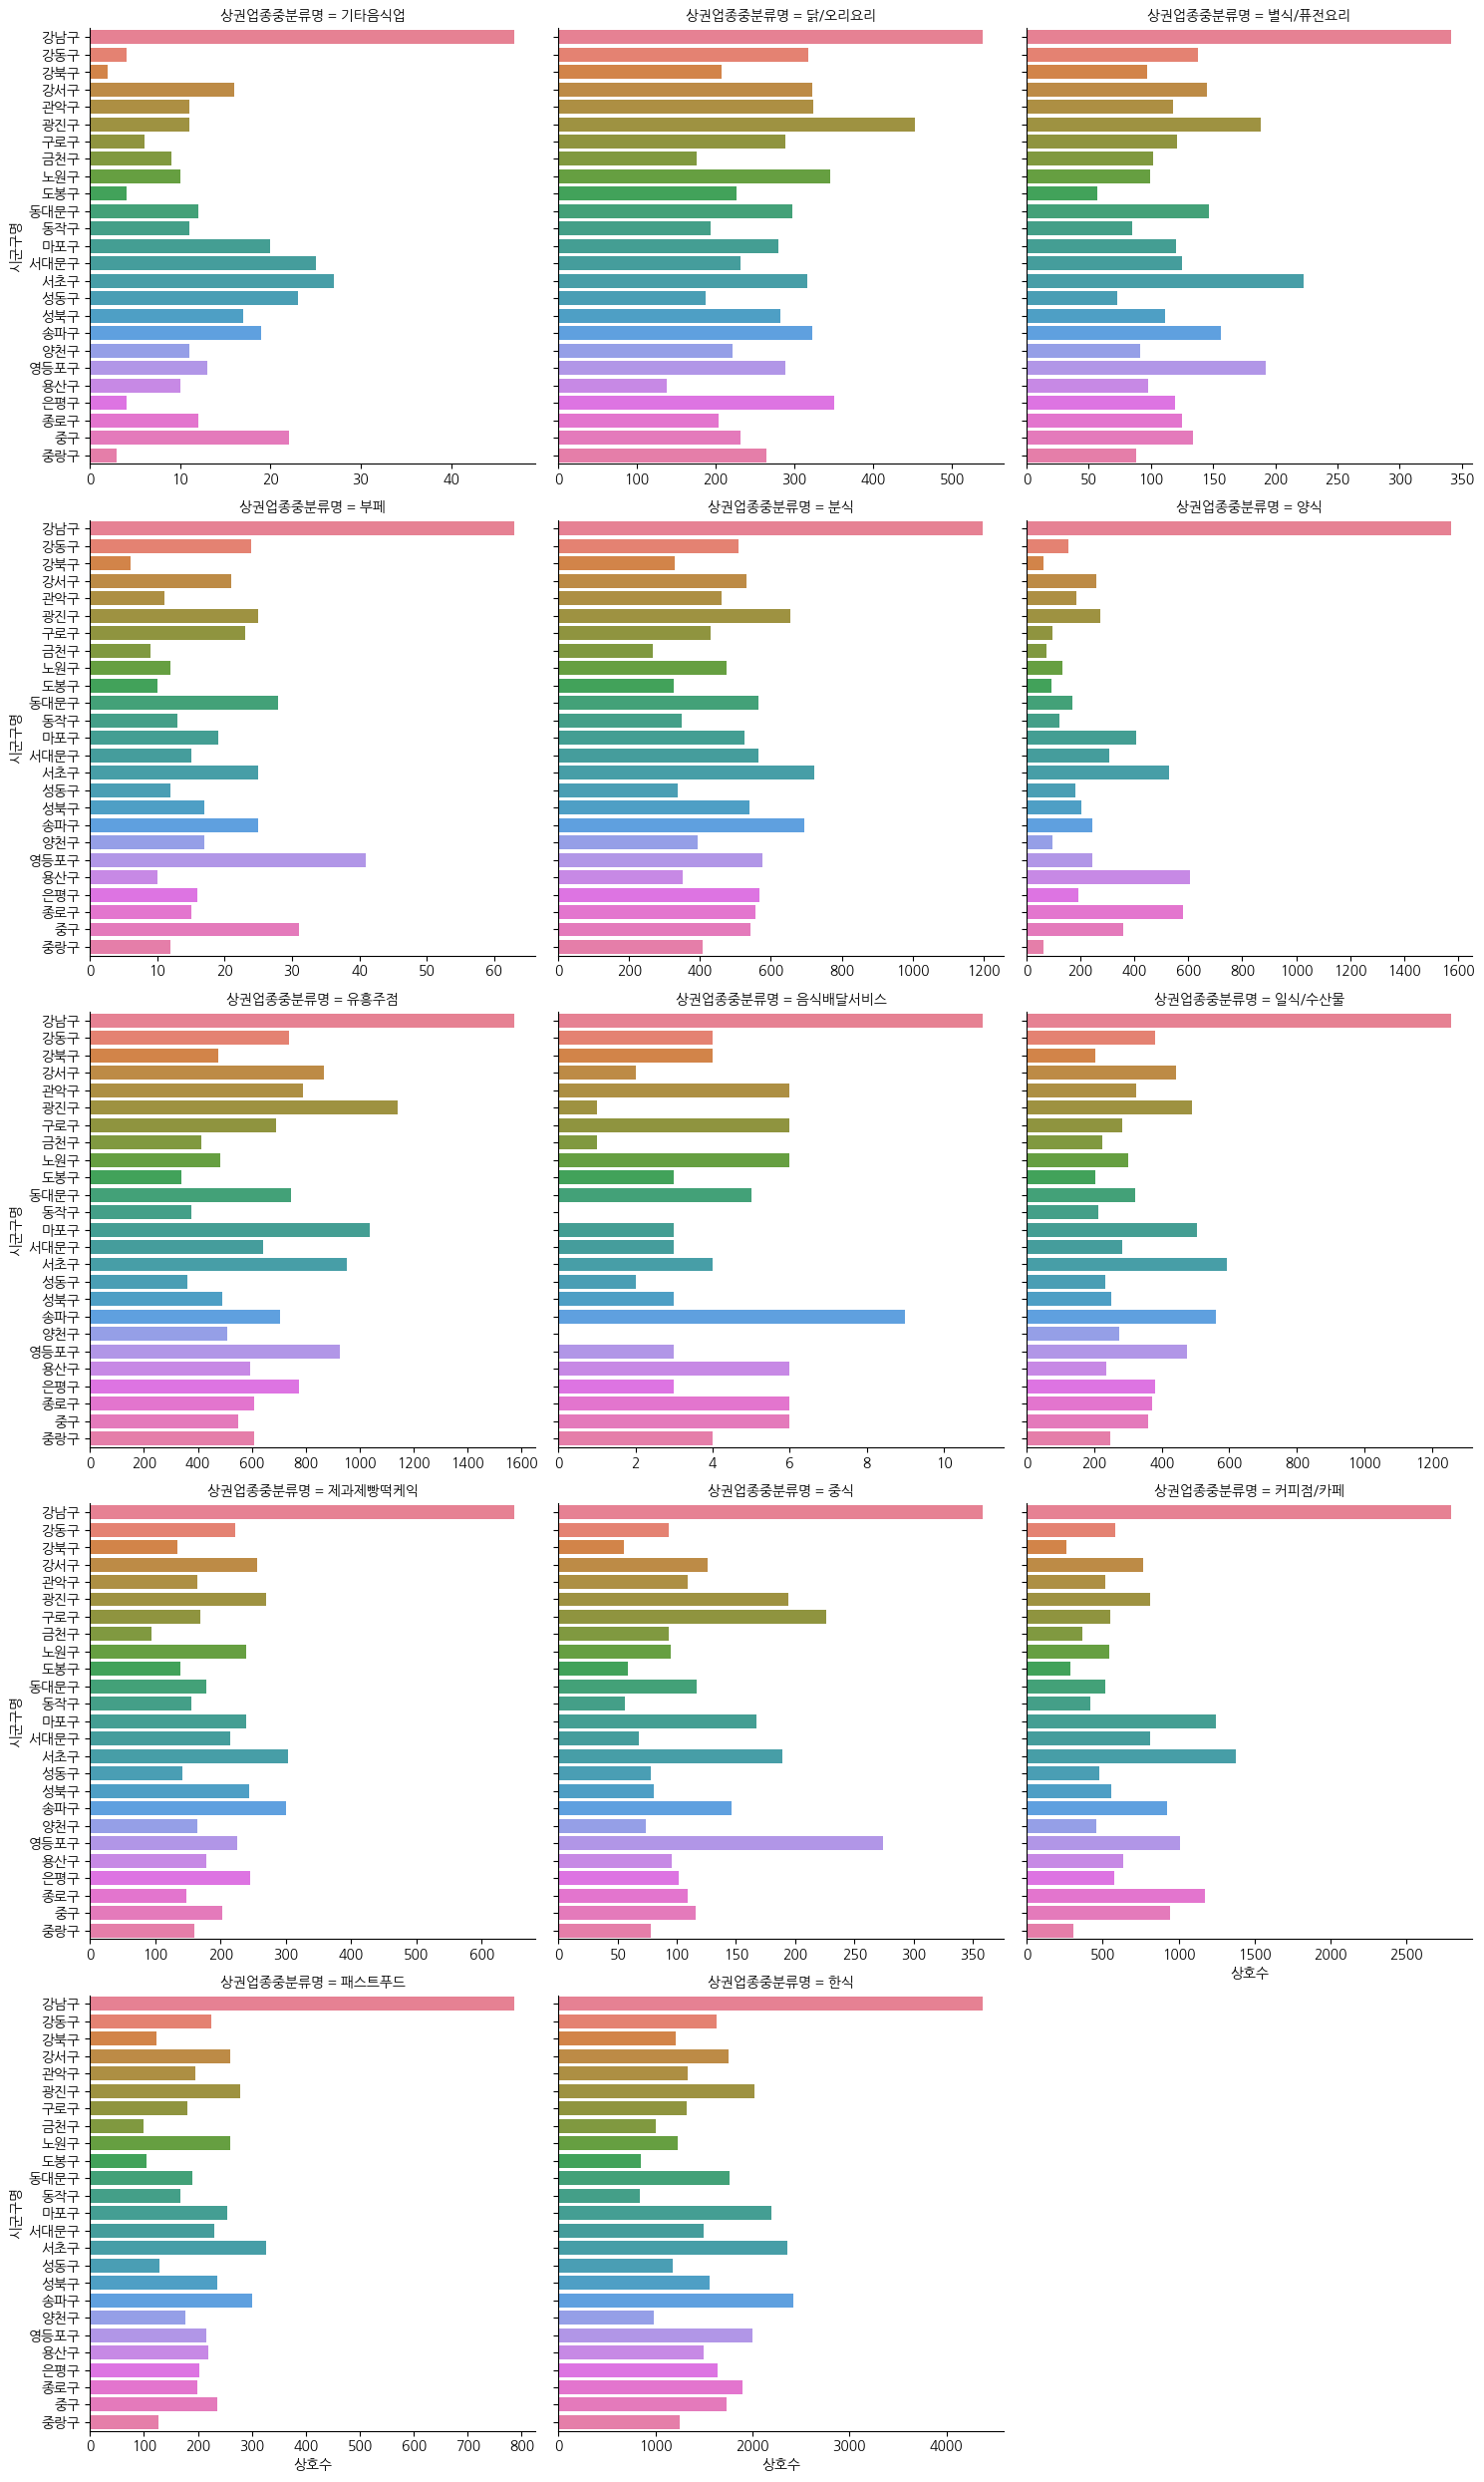

In [ ]:
# catplot으로 '상권업종중분류명'별로 가로로 시각화
sns.catplot(data = food,
            x = '상호수',
            y = '시군구명',
            kind = 'bar',
            col = '상권업종중분류명',
            col_wrap = 3,
            hue = '시군구명',
            sharex = False)

## 구별 학원수 비교

### 서브셋 만들고 집계

In [ ]:
# 학원의 분류명
df['상권업종대분류명'].unique()

array(['음식', '생활서비스', '소매', '의료', '학문/교육', '관광/여가/오락', '부동산', '숙박', '스포츠'],
      dtype=object)

In [ ]:
# 서울의 학원들만 df_academy에 저장
df_academy = df[(df['상권업종대분류명'] == '학문/교육') & (df['시도명'] == '서울특별시')].copy()
df_academy.head()

상가업소번호       상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드    상권업종중분류명  \
85   20776515  GIA보석교육원  NaN         R    학문/교육       R03  학원-자격/국가고시   
101  20736806     안재형영어  NaN         R    학문/교육       R04       학원-어학   
121  20769711       정아트  NaN         R    학문/교육       R05   학원-음악미술무용   
126  20887860     경찰태권도  NaN         R    학문/교육       R07   학원-예능취미체육   
134  20924451   아트인스튜디오  NaN         R    학문/교육       R05   학원-음악미술무용   

    상권업종소분류코드   상권업종소분류명 표준산업분류코드         표준산업분류명  시도코드    시도명  시군구코드 시군구명  \
85     R03A11    학원-보석감정   P85659  기타 기술 및 직업훈련학원    11  서울특별시  11680  강남구   
101    R04A01  학원-외국어/어학   P85502           외국어학원    11  서울특별시  11470  양천구   
121    R05A01   서예/서화/미술   P85620           예술 학원    11  서울특별시  11500  강서구   
126    R07A20       태권도장   P85611        스포츠 교육기관    11  서울특별시  11290  성북구   
134    R05A01   서예/서화/미술   P85620           예술 학원    11  서울특별시  11680  강남구   

          행정동코드  행정동명       법정동코드 법정동명                 지번코드  대지구분코드 대지구분명  \
85   1168054500  압구정동  1168010700  신사동  1168010700206390003       1    대지   
101  1147055000   목5동  1147010200   목동  1147010200209050034       1    대지   
121  1150051000   염창동  1150010100  염창동  1150010100201840008       1    대지   
126  1129066000  길음1동  1129013400  길음동  1129013400212830004       1    대지   
134  1168064000  역삼1동  1168010100  역삼동  1168010100208180001       1    대지   

     지번본번지  지번부번지                  지번주소         도로명코드                도로명  \
85     639    3.0   서울특별시 강남구 신사동 639-3  116803122007     서울특별시 강남구 압구정로   
101    905   34.0   서울특별시 양천구 목동 905-34  114703114003     서울특별시 양천구 목동서로   
121    184    8.0   서울특별시 강서구 염창동 184-8  115004145427  서울특별시 강서구 양천로73가길   
126   1283    4.0  서울특별시 성북구 길음동 1283-4  112903107001      서울특별시 성북구 길음로   
134    818    1.0   서울특별시 강남구 역삼동 818-1  116804166038  서울특별시 강남구 강남대로96길   

     건물본번지  건물부번지                     건물관리번호                 건물명  \
85     320    NaN  1168010700106390003009673           극동GALLERY   
101    133    2.0  1147010200109050034000001             목동하나프라자   
121     21    NaN  1150010100101840008028367             한양피아노학원   
126     20    NaN  1129013400112830004000001  길음뉴타운,래미안길음3차아파트상가   
134     12    NaN  1168010100108180001023766                 NaN   

                    도로명주소   구우편번호   신우편번호  동정보  층정보  호정보          경도  \
85     서울특별시 강남구 압구정로 320  135896  6017.0  NaN    5  NaN  127.036437   
101  서울특별시 양천구 목동서로 133-2  158050  7988.0  NaN    7  NaN  126.875973   
121  서울특별시 강서구 양천로73가길 21  157861  7541.0  NaN    2  NaN  126.873645   
126      서울특별시 성북구 길음로 20  136110  2725.0  NaN    5  NaN  127.023020   
134  서울특별시 강남구 강남대로96길 12  135080  6129.0  NaN  NaN    3  127.028054   

            위도  
85   37.528532  
101  37.531592  
121  37.550924  
126  37.604749  
134  37.499729

In [ ]:
# '상권업종소분류명'의 빈도수
academy_count = df_academy['상권업종소분류명'].value_counts()
academy_count

상권업종소분류명
학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
               ... 
학원-비디오            1
학원-지점토            1
학원-항공기술           1
학원-동물사육           1
학원-TV기술           1
Name: count, Length: 106, dtype: int64

In [ ]:
# '상권업종소분류명'중 빈도수가 1000개 이상인 데이터만 따로 확인
academy_count_1000 = academy_count[academy_count >= 1000]
academy_count_1000

상권업종소분류명
학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: count, dtype: int64

In [ ]:
# '시군구명', '상권업종소분류명' 으로 그룹화 한 후 '상호명'으로 빈도수를 계산

g_academy = df_academy.pivot_table(index = ['시군구명', '상권업종소분류명'],
                                 values = '상호명',
                                 aggfunc = 'count')
g_academy = g_academy.reset_index()
g_academy.columns = ['시군구명', '상권업종소분류명', '상호수']
g_academy.head()

시군구명  상권업종소분류명  상호수
0  강남구      검도도장    9
1  강남구       고시원  139
2  강남구       놀이방    8
3  강남구       독서실  125
4  강남구  서예/서화/미술  219

### seaborn으로 시각화

<Axes: xlabel='시군구명', ylabel='상호수'>

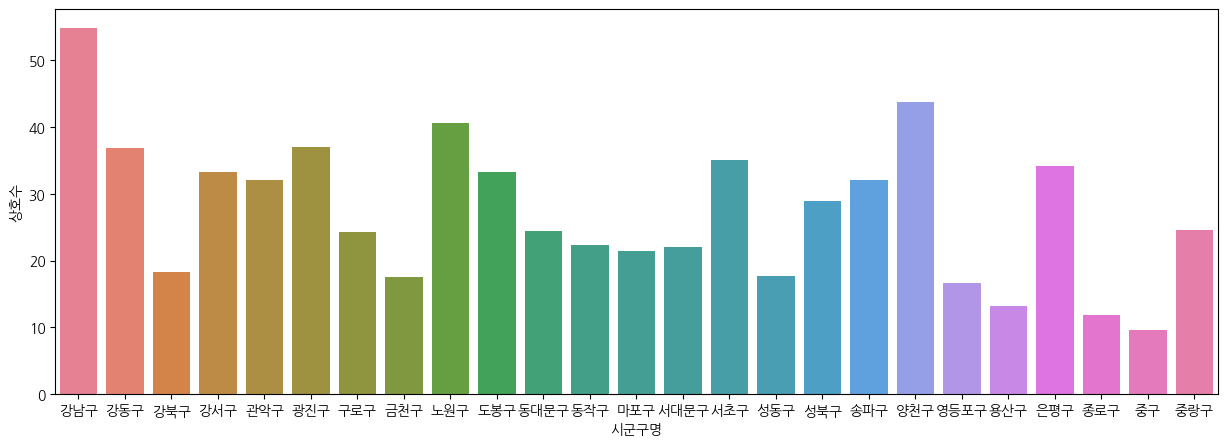

In [ ]:
# 구 별 상호수를 barplot으로 시각화
plt.figure(figsize = (15, 5))
sns.barplot(data = g_academy, x = '시군구명', y = '상호수', hue = '시군구명', errorbar = None)

<Axes: xlabel='상권업종소분류명', ylabel='상호수'>

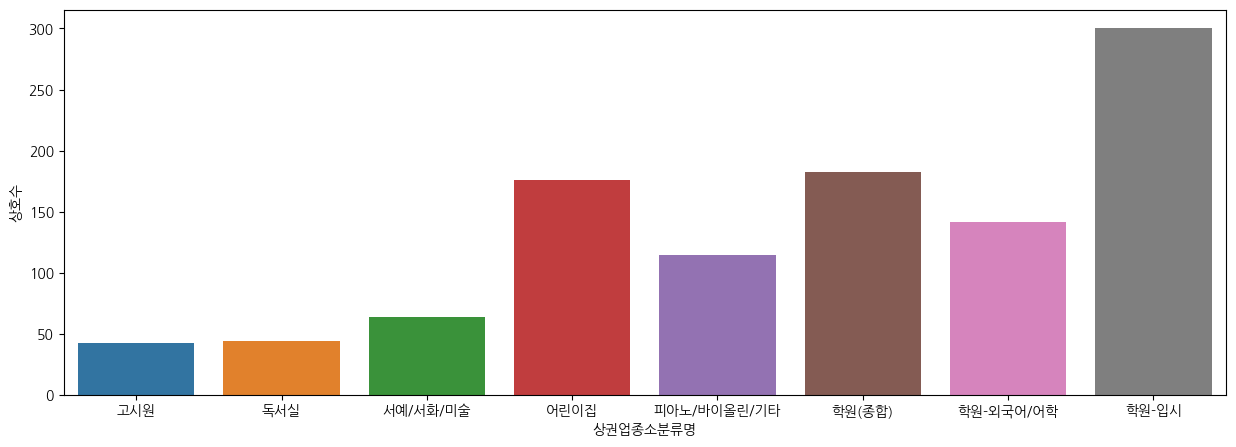

In [ ]:
plt.figure(figsize = (15, 5))
sns.barplot(data = g_academy.loc[g_academy['상권업종소분류명'].isin(academy_count_1000.index)],
            x = '상권업종소분류명',
            y = '상호수',
            hue = '상권업종소분류명',
            errorbar = None)

<Axes: xlabel='시군구명', ylabel='상호수'>

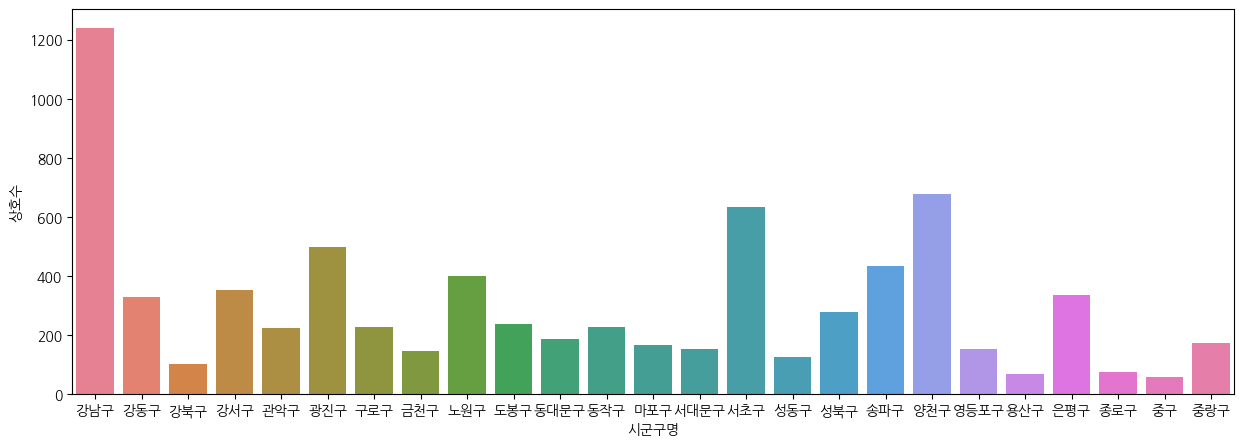

In [ ]:
plt.figure(figsize = (15, 5))
sns.barplot(data = g_academy.loc[g_academy['상권업종소분류명'] == '학원-입시'],
            x = '시군구명',
            y = '상호수',
            hue = '시군구명',
            errorbar = None)

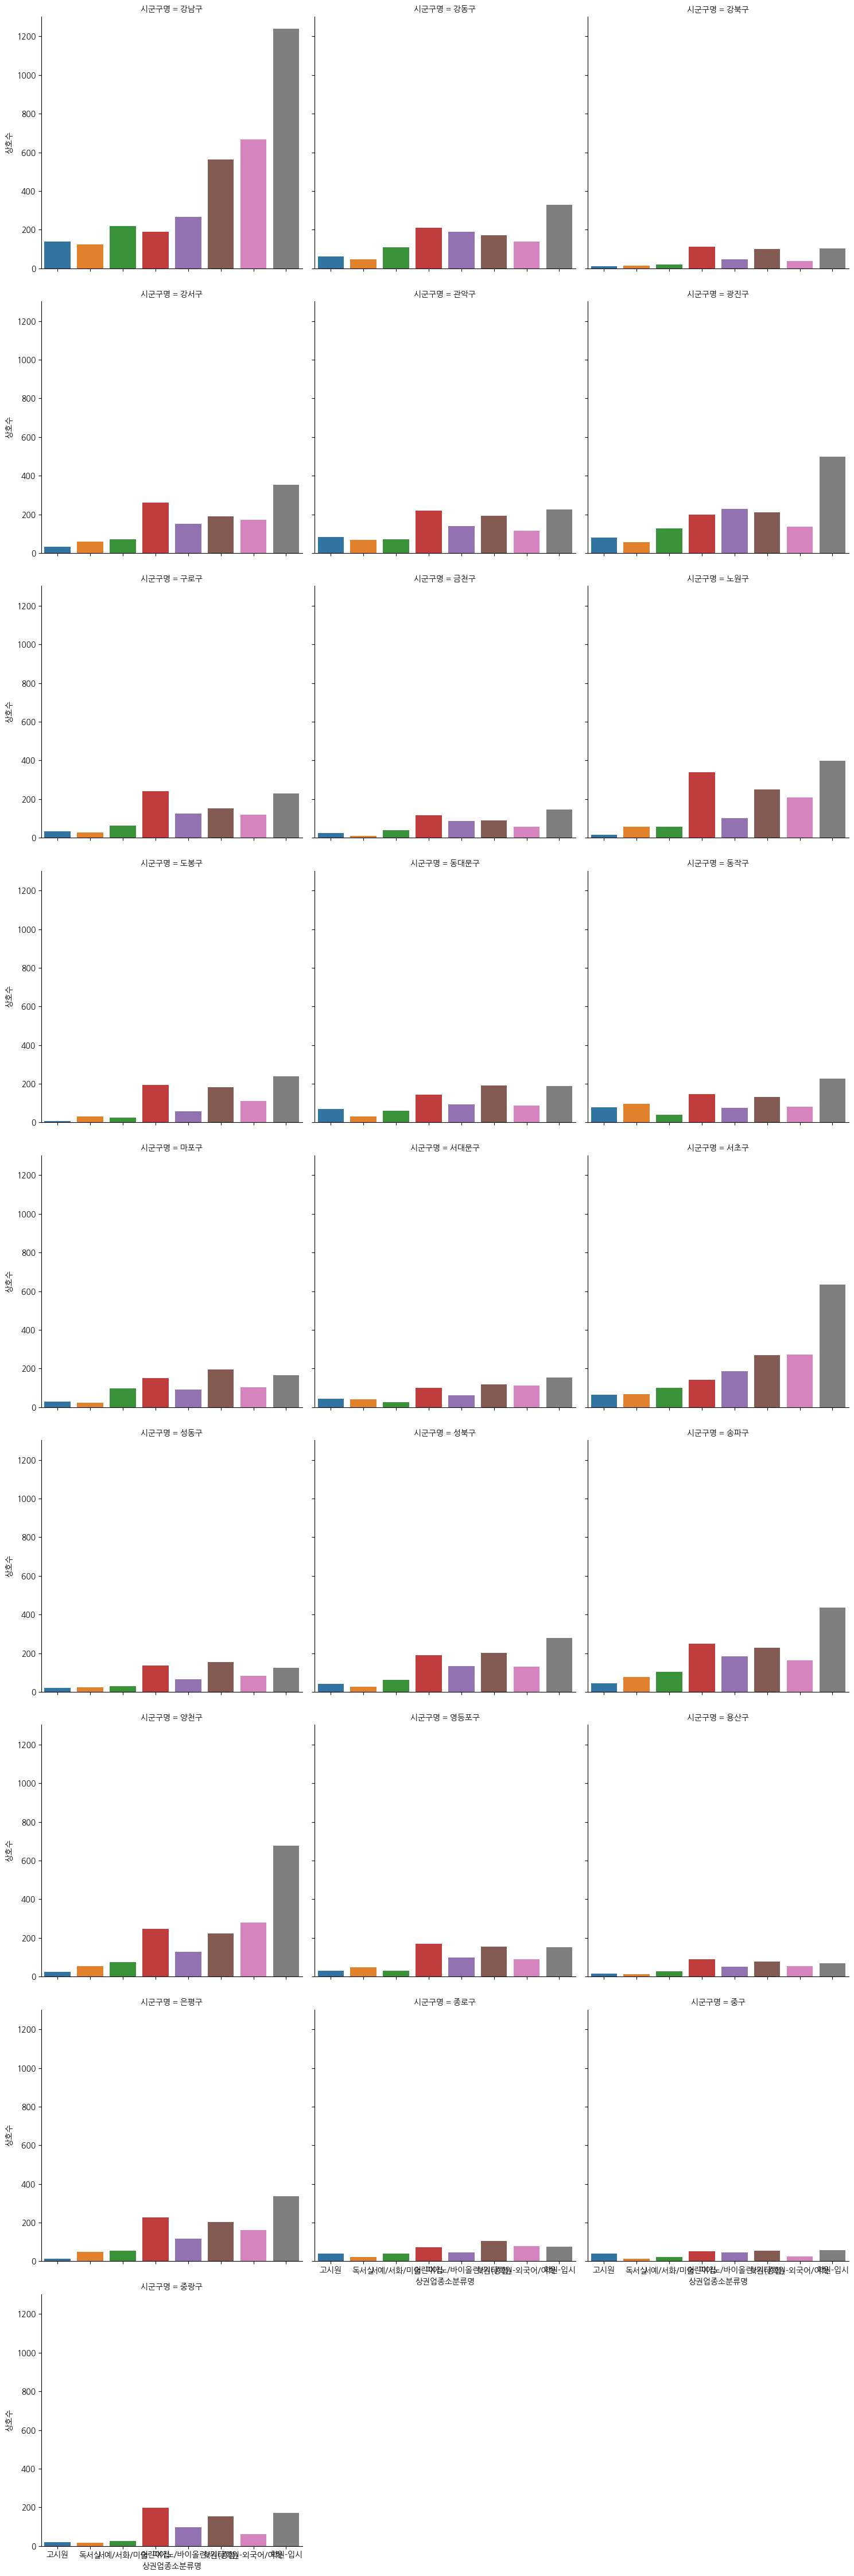

In [ ]:
sns.catplot(data = g_academy.loc[g_academy['상권업종소분류명'].isin(academy_count_1000.index)],
            x = '상권업종소분류명',
            y = '상호수',
            kind = 'bar',
            col = '시군구명',
            col_wrap = 3,
            hue = '상권업종소분류명',
            errorbar = None)

### isin()을 사용해 서브셋 만들기

In [ ]:
academy_count_1000.index

Index(['학원-입시', '학원(종합)', '어린이집', '학원-외국어/어학', '피아노/바이올린/기타', '서예/서화/미술',
       '독서실', '고시원'],
      dtype='object', name='상권업종소분류명')

In [ ]:
# '상권업종소분류명'의 빈도수가 1000개 이상인 데이터만 df_academy_selected에 저장
print(df_academy.shape)
df_academy_selected = df_academy[df_academy['상권업종소분류명'].isin(academy_count_1000.index)].copy()
print(df_academy_selected.shape)

(31509, 39)
(26630, 39)


In [ ]:
df_academy_selected['상권업종소분류명'].value_counts()

상권업종소분류명
학원-입시          7509
학원(종합)         4561
어린이집           4395
학원-외국어/어학      3544
피아노/바이올린/기타    2868
서예/서화/미술       1595
독서실            1096
고시원            1062
Name: count, dtype: int64

In [ ]:
# '시군구명'의 빈도수
df_academy_selected['시군구명'].value_counts()

시군구명
강남구     3410
서초구     1732
양천구     1706
광진구     1536
송파구     1484
노원구     1425
강서구     1288
강동구     1255
은평구     1162
관악구     1115
성북구     1066
구로구      987
동작구      877
동대문구     863
마포구      857
도봉구      849
영등포구     775
중랑구      745
서대문구     656
성동구      642
금천구      568
종로구      479
강북구      444
용산구      395
중구       314
Name: count, dtype: int64

In [ ]:
# 대치동의 '상권업종소분류명' 빈도수
df_academy_selected.loc[df_academy_selected['법정동명'] == '대치동',
                        '상권업종소분류명'].value_counts()

상권업종소분류명
학원-입시          831
학원-외국어/어학      281
학원(종합)         211
서예/서화/미술       113
피아노/바이올린/기타     60
독서실             42
고시원             30
어린이집            16
Name: count, dtype: int64

In [ ]:
# 목동의 '상권업종소분류명' 빈도수
df_academy_selected.loc[df_academy_selected['법정동명'] == '목동',
                        '상권업종소분류명'].value_counts()

상권업종소분류명
학원-입시          375
학원-외국어/어학      152
학원(종합)          88
어린이집            61
피아노/바이올린/기타     41
서예/서화/미술        39
독서실             22
고시원              7
Name: count, dtype: int64

In [ ]:
# '상권업종소분류명', '시군구명' 으로 그룹화 하고 '상호명'의 빈도수를 계산
g = df_academy_selected.pivot_table(index = ['상권업종소분류명', '시군구명'],
                                values = '상호명',
                                aggfunc = 'count')
g

상호명
상권업종소분류명 시군구명     
고시원      강남구   139
         강동구    62
         강북구    11
         강서구    32
         관악구    83
...            ...
학원-입시    용산구    70
         은평구   337
         종로구    75
         중구     59
         중랑구   172

[200 rows x 1 columns]

### seaborn으로 시각화

<Axes: xlabel='상호명', ylabel='시군구명'>

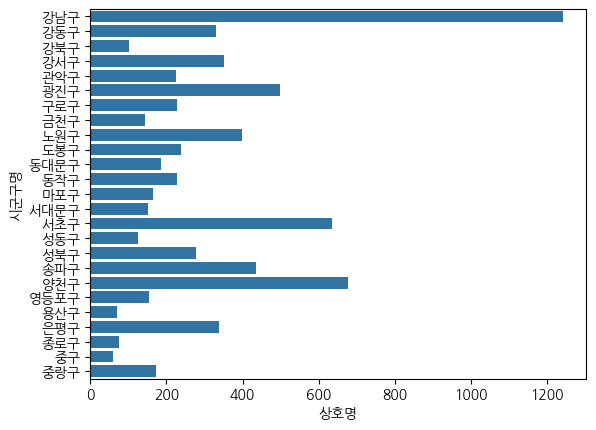

In [ ]:
# '상권업종소분류명' 중 '학원-입시'만 가져와서 bargraph로 시각화
sns.barplot(data = g.loc['학원-입시'],
            x = '상호명',
            y = '시군구명')

### unstack()

In [ ]:
g.unstack()

상호명                                                              \
시군구명          강남구  강동구  강북구  강서구  관악구  광진구  구로구  금천구  노원구  도봉구 동대문구  동작구  마포구   
상권업종소분류명                                                                        
고시원           139   62   11   32   83   81   33   24   14    8   69   79   29   
독서실           125   46   14   60   69   57   26   10   58   30   31   95   24   
서예/서화/미술      219  110   19   70   72  129   62   39   56   25   61   41   98   
어린이집          189  210  112  262  220  198  242  117  338  194  144  148  151   
피아노/바이올린/기타   266  189   47  150  139  227  125   88  102   58   94   75   92   
학원(종합)        564  170  101  191  192  210  151   89  251  183  190  131  195   
학원-외국어/어학     667  139   37  171  115  136  119   56  207  112   87   81  102   
학원-입시        1241  329  103  352  225  498  229  145  399  239  187  227  166   

                                                                       
시군구명        서대문구  서초구  성동구  성북구  송파구  양천구 영등포구 용산구  은평구  종로구  중구  중랑구  
상권업종소분류명                                                               
고시원           45   64   22   42   45   23   30  16   12   41  39   19  
독서실           40   67   25   27   77   53   48  13   48   23  12   18  
서예/서화/미술      26   99   31   62  103   74   30  26   55   39  23   26  
어린이집          99  141  136  191  249  246  169  89  228   72  53  197  
피아노/바이올린/기타   62  187   65  134  184  129   99  50  116   45  47   98  
학원(종합)       119  268  154  201  227  223  156  78  203  105  56  153  
학원-외국어/어학    113  272   83  130  164  281   90  53  163   79  25   62  
학원-입시        152  634  126  279  435  677  153  70  337   75  59  172

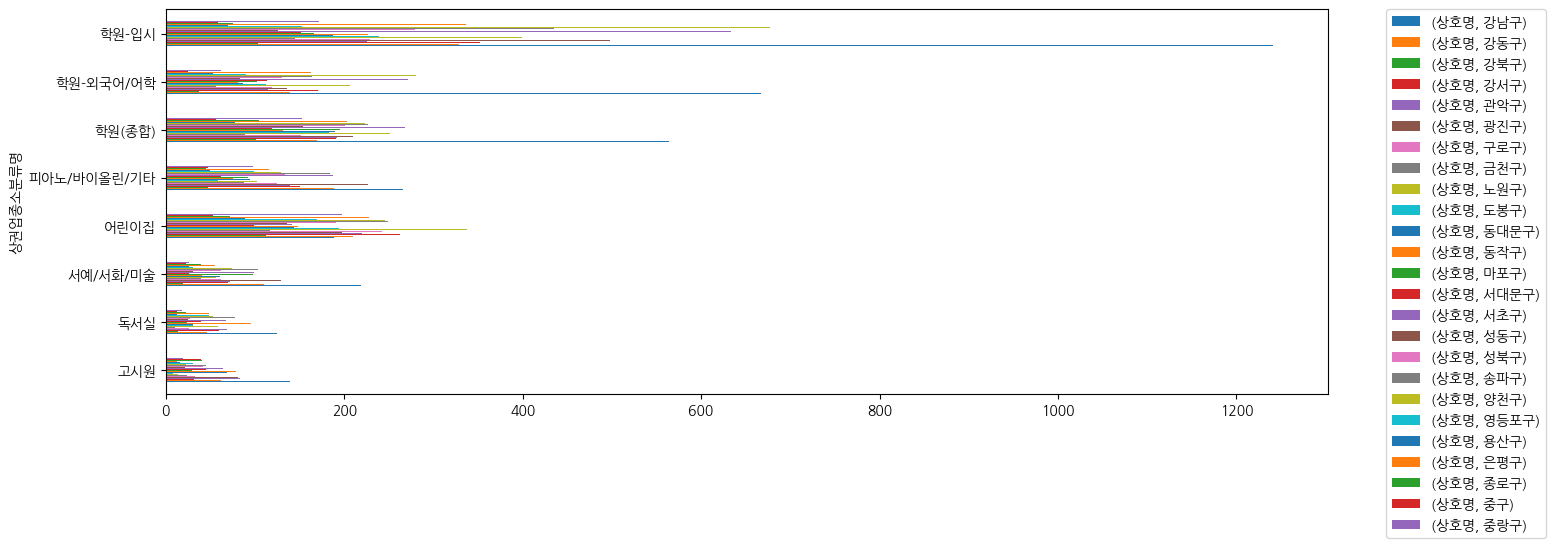

In [ ]:
g.unstack().plot.barh(figsize = (15, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

<Axes: xlabel='None,시군구명'>

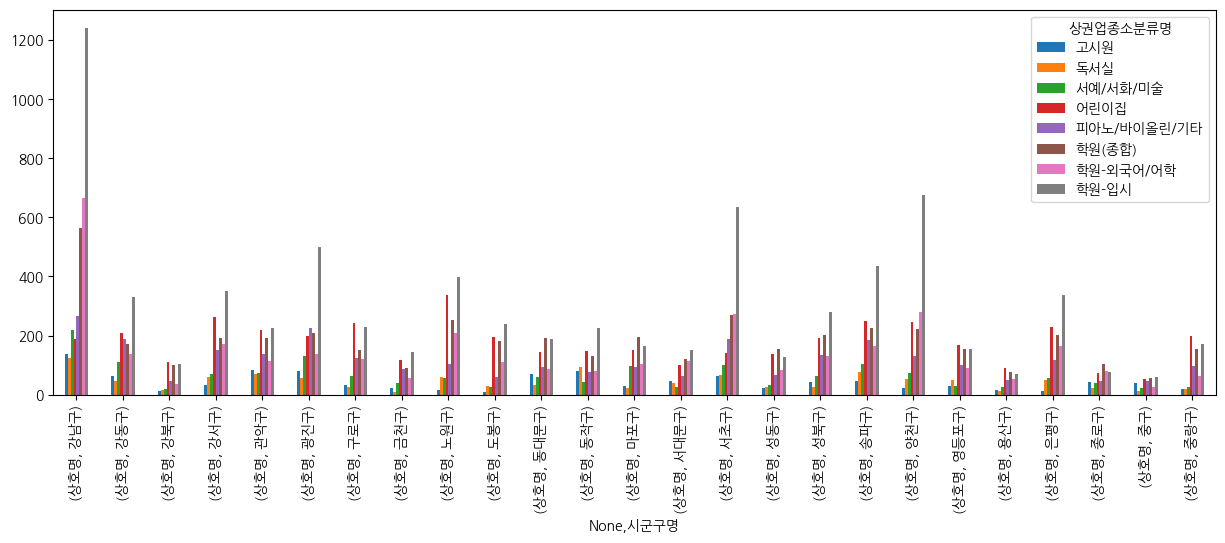

In [ ]:
g.unstack().T.plot.bar(figsize=(15, 5))

In [ ]:
g.index

MultiIndex([(  '고시원',  '강남구'),
            (  '고시원',  '강동구'),
            (  '고시원',  '강북구'),
            (  '고시원',  '강서구'),
            (  '고시원',  '관악구'),
            (  '고시원',  '광진구'),
            (  '고시원',  '구로구'),
            (  '고시원',  '금천구'),
            (  '고시원',  '노원구'),
            (  '고시원',  '도봉구'),
            ...
            ('학원-입시',  '성동구'),
            ('학원-입시',  '성북구'),
            ('학원-입시',  '송파구'),
            ('학원-입시',  '양천구'),
            ('학원-입시', '영등포구'),
            ('학원-입시',  '용산구'),
            ('학원-입시',  '은평구'),
            ('학원-입시',  '종로구'),
            ('학원-입시',   '중구'),
            ('학원-입시',  '중랑구')],
           names=['상권업종소분류명', '시군구명'], length=200)

### 경도와 위도를 scatterplot으로 표현하기

<Axes: xlabel='경도', ylabel='위도'>

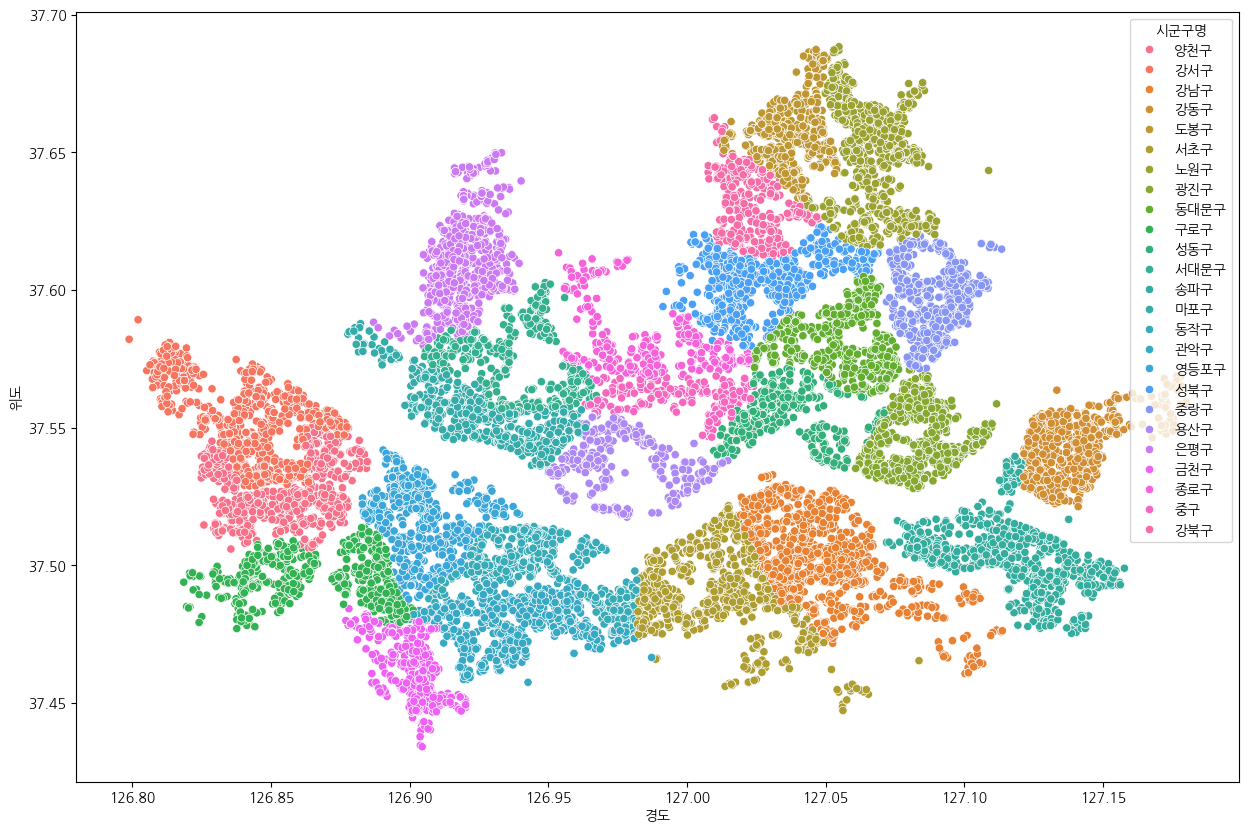

In [ ]:
# scatterplot 으로 '경도'와 '위도'를 시각화
plt.figure(figsize = (15, 10))
sns.scatterplot(data = df_academy_selected, x = '경도', y = '위도', hue = '시군구명')

<Axes: xlabel='경도', ylabel='위도'>

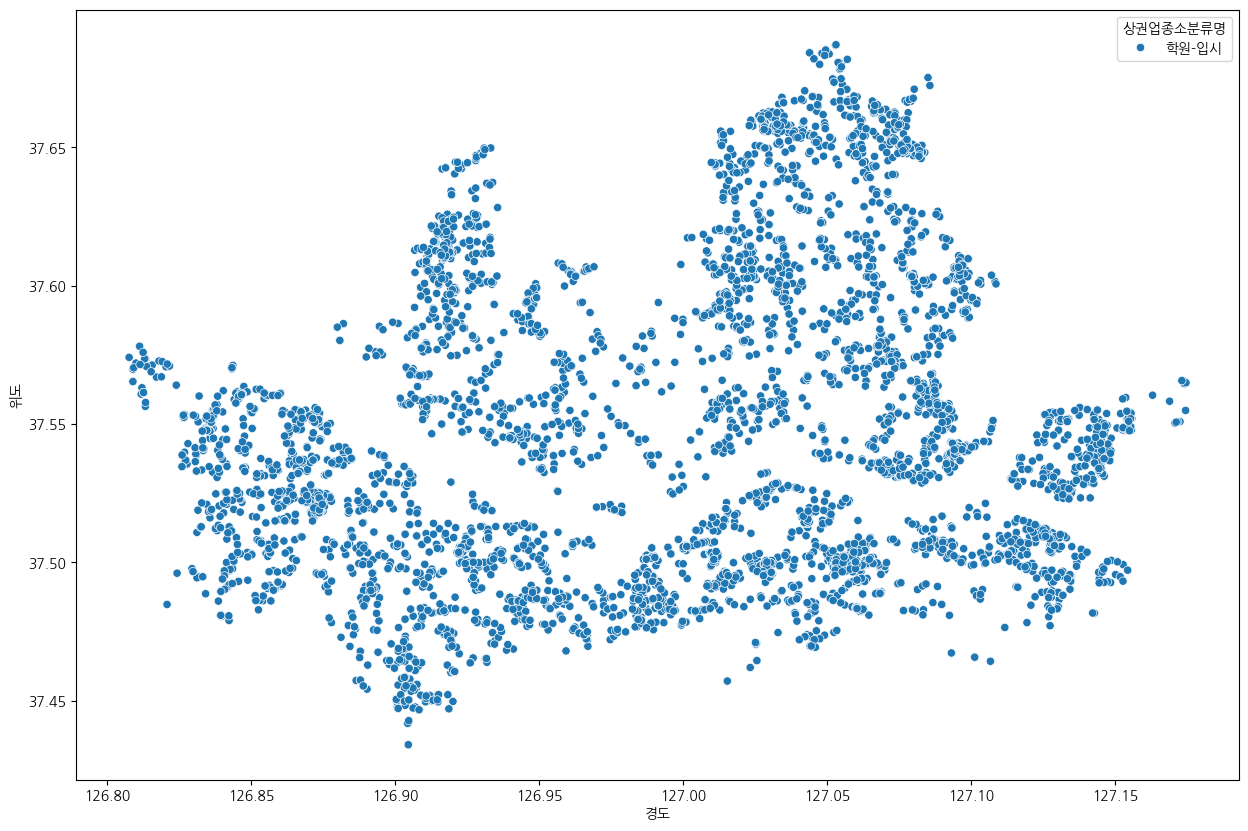

In [ ]:
# scatterplot 으로 '학원-입시'의 '경도'와 '위도'를 시각화
plt.figure(figsize = (15, 10))
sns.scatterplot(data = df_academy_selected.loc[df_academy_selected['상권업종소분류명'] == '학원-입시'],
                x = '경도',
                y = '위도',
                hue = '상권업종소분류명')

<Axes: xlabel='경도', ylabel='위도'>

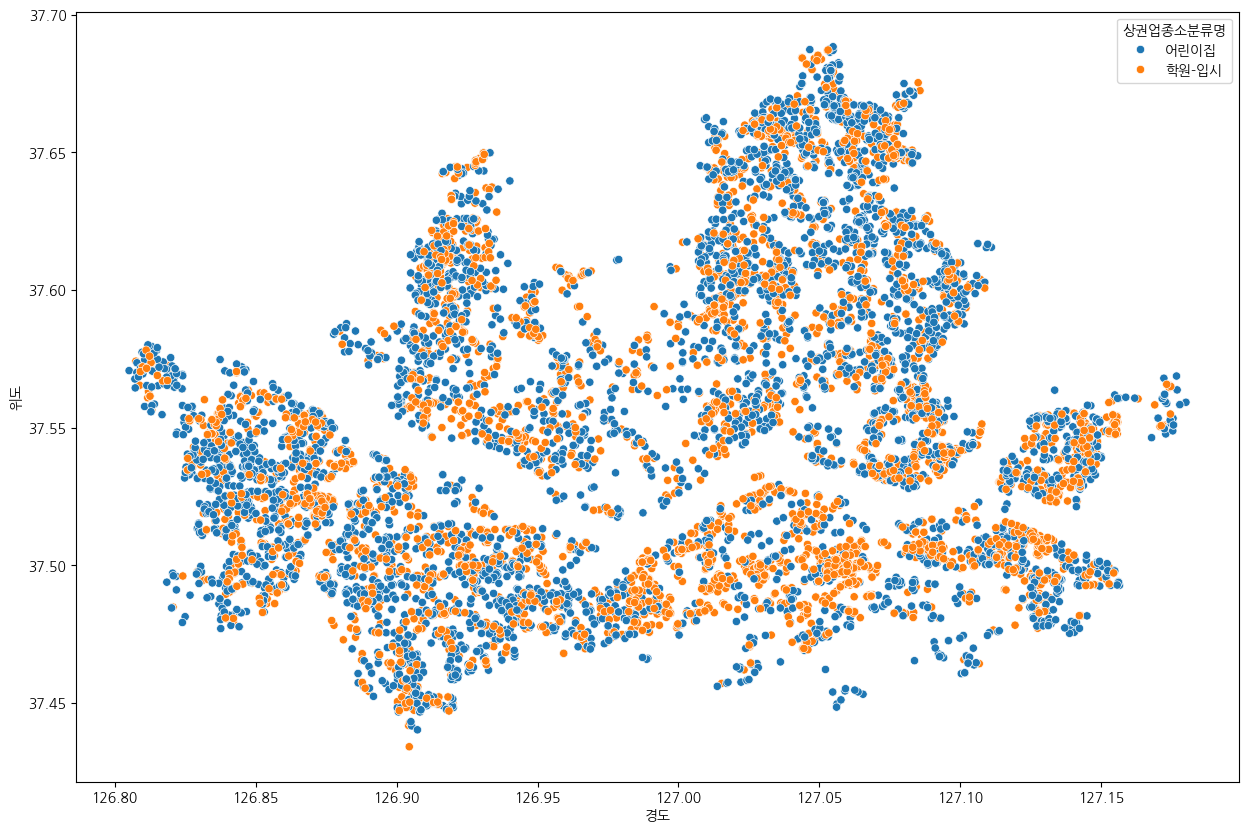

In [ ]:
# scatterplot 으로 '학원-입시'와 '어린이집'의 '경도'와 '위도'를 시각화
plt.figure(figsize = (15, 10))
sns.scatterplot(data = df_academy_selected.loc[df_academy_selected['상권업종소분류명'].isin(['학원-입시', '어린이집'])],
                x = '경도',
                y = '위도',
                hue = '상권업종소분류명')

## folium으로 지도 그리기

In [ ]:
import folium

In [ ]:
# 첫 화면의 지도 위치
long = df_academy_selected['경도'].mean()
lat = df_academy_selected['위도'].mean()

In [ ]:
df_m = df_academy_selected[
        df_academy_selected["상권업종소분류명"].isin(["어린이집", "학원-입시"])]
df_m = df_m.sample(1000)
df_m.shape

(1000, 39)

In [ ]:
m = folium.Map(location = [lat, long], zoom_start = 12)

folium.Marker([37.5545, 126.867], tooltip="해법수학").add_to(m)

m

In [ ]:
m.save('index.html')

In [ ]:
for i in df_m.index:
    tooltip = df_m.loc[i, "상호명"] + '-' + df_m.loc[i, '도로명주소']
    lat = df_m.loc[i, "위도"]
    long = df_m.loc[i, "경도"]

    # CircleMarker()도 가능
    folium.Marker([lat, long], tooltip=tooltip).add_to(m)

m